In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from ppxf_functions import (
    load_spectrum,
    process_spectrum,
    rebin_to_log,
    make_noise,
    calculate_velscale_fwhm,
    run_ppxf,
    plot_ppxf,
)

In [2]:
raw = np.load("../calibrated data/NB6_data.npy")       # rename your 2D array
waveem = np.load("../calibrated data/NB6_waveem.npy")

window_size = 5
step        = 1
scale       = 0.4   # arcsec per pixel

pix_min, pix_max = 150, 250   
results = []
raw_roi = raw[:, pix_min:pix_max]

for start in range(0, raw_roi.shape[1] - window_size + 1, step):
    end = start + window_size
    spectrum = raw_roi[:, start:end].sum(axis=1)

    # Build DataFrame for this spectrum
    df_spec = pd.DataFrame({
        "waveem": waveem,
        "flux":   spectrum
    })

    # Process, rebin, and run pPXF
    df_cut = process_spectrum(df_spec)
    noise = make_noise(df_cut)
    df_rb, lam, flux_rb, ln_w = rebin_to_log(df_cut)
    velscale, fwhm = calculate_velscale_fwhm(ln_w, lam)
    pp, gas_templates = run_ppxf(lam, fwhm, velscale, df_rb, noise)

    # Compute global center index
    center = start + window_size//2 + pix_min
    print(f'PIXEL: {center}')

    # Store center, rebinned DataFrame, and fit result
    results.append((center, df_rb, pp))


Emission lines included in gas templates:
['Hdelta' 'Hgamma' 'Hbeta' 'Halpha' '[SII]6716' '[SII]6731' 'HeII4687'
 'HeI5876' '[OIII]5007_d' '[OI]6300_d' '[NII]6583_d']
 Best Fit:       Vel     sigma
 comp.  0:      -542      1000
 comp.  1:       176        90
 comp.  2:       203        78
chi2/DOF: 0.4686; DOF: 1620; degree = -1; mdegree = 10
method = capfit; Jac calls: 5; Func calls: 87; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%): 4/152
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component           name        flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp:  1                Halpha      20.57       1.2     176    90
Comp:  2           [NII]6583_d      8.320       1.5     203    78
-----------------------------------------------------------------
pPXF fit done in 1.04 s
PIXEL: 152
Emission lines included in gas templates:
['Hdelta' 'Hgamma' 'Hbeta' 'Halpha' '[SII]6716' '[SII]6731' 'HeII4

 Best Fit:       Vel     sigma
 comp.  0:        -6       289
 comp.  1:       209        80
 comp.  2:       263      1000
chi2/DOF: 0.4414; DOF: 1620; degree = -1; mdegree = 10
method = capfit; Jac calls: 8; Func calls: 139; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%): 5/152
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component           name        flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp:  1                Halpha      7.476      0.99     209    80
Comp:  2           [NII]6583_d      1.413       2.9     263  1000
-----------------------------------------------------------------
pPXF fit done in 1.26 s
PIXEL: 161
Emission lines included in gas templates:
['Hdelta' 'Hgamma' 'Hbeta' 'Halpha' '[SII]6716' '[SII]6731' 'HeII4687'
 'HeI5876' '[OIII]5007_d' '[OI]6300_d' '[NII]6583_d']
 Best Fit:       Vel     sigma
 comp.  0:       -52       266
 comp.  1:       196       104
 comp.  2:    

Emission lines included in gas templates:
['Hdelta' 'Hgamma' 'Hbeta' 'Halpha' '[SII]6716' '[SII]6731' 'HeII4687'
 'HeI5876' '[OIII]5007_d' '[OI]6300_d' '[NII]6583_d']
 Best Fit:       Vel     sigma
 comp.  0:       -55       323
 comp.  1:       157        95
 comp.  2:       200         1
chi2/DOF: 0.5496; DOF: 1620; degree = -1; mdegree = 10
method = capfit; Jac calls: 6; Func calls: 104; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%): 5/152
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component           name        flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp:  1                Halpha      7.165       1.0     157    95
Comp:  2           [NII]6583_d      3.688       1.2     200     1
-----------------------------------------------------------------
pPXF fit done in 0.96 s
PIXEL: 171
Emission lines included in gas templates:
['Hdelta' 'Hgamma' 'Hbeta' 'Halpha' '[SII]6716' '[SII]6731' 'HeII

 Best Fit:       Vel     sigma
 comp.  0:        20       754
 comp.  1:        94        77
 comp.  2:       133        26
chi2/DOF: 0.2992; DOF: 1620; degree = -1; mdegree = 10
method = capfit; Jac calls: 7; Func calls: 124; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%): 5/152
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component           name        flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp:  1                Halpha      10.63      0.55      94    77
Comp:  2           [NII]6583_d      5.220      0.65     133    26
-----------------------------------------------------------------
pPXF fit done in 3.17 s
PIXEL: 180
Emission lines included in gas templates:
['Hdelta' 'Hgamma' 'Hbeta' 'Halpha' '[SII]6716' '[SII]6731' 'HeII4687'
 'HeI5876' '[OIII]5007_d' '[OI]6300_d' '[NII]6583_d']
 Best Fit:       Vel     sigma
 comp.  0:      -137      1000
 comp.  1:       113        80
 comp.  2:    

Emission lines included in gas templates:
['Hdelta' 'Hgamma' 'Hbeta' 'Halpha' '[SII]6716' '[SII]6731' 'HeII4687'
 'HeI5876' '[OIII]5007_d' '[OI]6300_d' '[NII]6583_d']
 Best Fit:       Vel     sigma
 comp.  0:      -214       251
 comp.  1:        47       119
 comp.  2:        49       104
chi2/DOF: 0.1563; DOF: 1620; degree = -1; mdegree = 10
method = capfit; Jac calls: 7; Func calls: 121; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%): 5/152
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component           name        flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp:  1                Halpha      2.998      0.91      47   119
Comp:  2           [NII]6583_d      2.821       1.1      49   104
-----------------------------------------------------------------
pPXF fit done in 1.10 s
PIXEL: 190
Emission lines included in gas templates:
['Hdelta' 'Hgamma' 'Hbeta' 'Halpha' '[SII]6716' '[SII]6731' 'HeII

 Best Fit:       Vel     sigma
 comp.  0:       -37        92
 comp.  1:       -44        50
 comp.  2:       -21        69
chi2/DOF: 0.1533; DOF: 1620; degree = -1; mdegree = 10
method = capfit; Jac calls: 7; Func calls: 121; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%): 5/152
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component           name        flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp:  1                Halpha      13.95      0.93     -44    50
Comp:  2           [NII]6583_d      7.190       1.2     -21    69
-----------------------------------------------------------------
pPXF fit done in 1.62 s
PIXEL: 199
Emission lines included in gas templates:
['Hdelta' 'Hgamma' 'Hbeta' 'Halpha' '[SII]6716' '[SII]6731' 'HeII4687'
 'HeI5876' '[OIII]5007_d' '[OI]6300_d' '[NII]6583_d']
 Best Fit:       Vel     sigma
 comp.  0:      -363      1000
 comp.  1:       -36        52
 comp.  2:    

Emission lines included in gas templates:
['Hdelta' 'Hgamma' 'Hbeta' 'Halpha' '[SII]6716' '[SII]6731' 'HeII4687'
 'HeI5876' '[OIII]5007_d' '[OI]6300_d' '[NII]6583_d']
 Best Fit:       Vel     sigma
 comp.  0:        41      1000
 comp.  1:       -58        69
 comp.  2:       -55        54
chi2/DOF: 0.1115; DOF: 1620; degree = -1; mdegree = 10
method = capfit; Jac calls: 10; Func calls: 175; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%): 3/152
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component           name        flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp:  1                Halpha      50.53       1.8     -58    69
Comp:  2           [NII]6583_d      23.21       2.2     -55    54
-----------------------------------------------------------------
pPXF fit done in 1.53 s
PIXEL: 209
Emission lines included in gas templates:
['Hdelta' 'Hgamma' 'Hbeta' 'Halpha' '[SII]6716' '[SII]6731' 'HeI

 Best Fit:       Vel     sigma
 comp.  0:      -180         1
 comp.  1:      -150       259
 comp.  2:      -124         1
chi2/DOF: 0.8440; DOF: 1620; degree = -1; mdegree = 10
method = capfit; Jac calls: 9; Func calls: 158; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%): 5/152
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component           name        flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp:  1                Halpha      6.676       3.0    -150   259
Comp:  2           [NII]6583_d      2.704       2.4    -124     1
-----------------------------------------------------------------
pPXF fit done in 2.14 s
PIXEL: 218
Emission lines included in gas templates:
['Hdelta' 'Hgamma' 'Hbeta' 'Halpha' '[SII]6716' '[SII]6731' 'HeII4687'
 'HeI5876' '[OIII]5007_d' '[OI]6300_d' '[NII]6583_d']
 Best Fit:       Vel     sigma
 comp.  0:      -185         1
 comp.  1:       -75         1
 comp.  2:    

Emission lines included in gas templates:
['Hdelta' 'Hgamma' 'Hbeta' 'Halpha' '[SII]6716' '[SII]6731' 'HeII4687'
 'HeI5876' '[OIII]5007_d' '[OI]6300_d' '[NII]6583_d']
 Best Fit:       Vel     sigma
 comp.  0:       249       204
 comp.  1:       -59        24
 comp.  2:       -60         1
chi2/DOF: 0.6580; DOF: 1620; degree = -1; mdegree = 10
method = capfit; Jac calls: 6; Func calls: 106; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%): 4/152
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component           name        flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp:  1                Halpha      16.60       2.8     -59    24
Comp:  2           [NII]6583_d      7.065       3.4     -60     1
-----------------------------------------------------------------
pPXF fit done in 0.85 s
PIXEL: 228
Emission lines included in gas templates:
['Hdelta' 'Hgamma' 'Hbeta' 'Halpha' '[SII]6716' '[SII]6731' 'HeII

 Best Fit:       Vel     sigma
 comp.  0:       334         1
 comp.  1:       -20        68
 comp.  2:       -11        82
chi2/DOF: 0.4446; DOF: 1620; degree = -1; mdegree = 10
method = capfit; Jac calls: 8; Func calls: 139; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%): 3/152
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component           name        flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp:  1                Halpha      40.69       2.2     -20    68
Comp:  2           [NII]6583_d      8.744       2.8     -11    82
-----------------------------------------------------------------
pPXF fit done in 1.12 s
PIXEL: 237
Emission lines included in gas templates:
['Hdelta' 'Hgamma' 'Hbeta' 'Halpha' '[SII]6716' '[SII]6731' 'HeII4687'
 'HeI5876' '[OIII]5007_d' '[OI]6300_d' '[NII]6583_d']
 Best Fit:       Vel     sigma
 comp.  0:       252         1
 comp.  1:         1        50
 comp.  2:    

Emission lines included in gas templates:
['Hdelta' 'Hgamma' 'Hbeta' 'Halpha' '[SII]6716' '[SII]6731' 'HeII4687'
 'HeI5876' '[OIII]5007_d' '[OI]6300_d' '[NII]6583_d']
 Best Fit:       Vel     sigma
 comp.  0:      -166        21
 comp.  1:        72        65
 comp.  2:       614       521
chi2/DOF: 0.5808; DOF: 1620; degree = -1; mdegree = 10
method = capfit; Jac calls: 5; Func calls: 87; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%): 4/152
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component           name        flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp:  1                Halpha      8.827       2.4      72    65
Comp:  2           [NII]6583_d      10.60       5.9     614   521
-----------------------------------------------------------------
pPXF fit done in 8.29 s
PIXEL: 247


Peak flux at 190 px


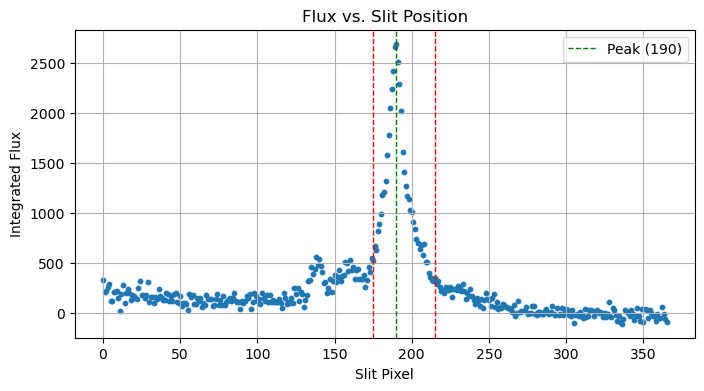

In [3]:
# raw.shape == (n_wave, n_spatial)
spatial_flux = raw.sum(axis=0)       # total flux in each slit column
slit_pixels  = np.arange(raw.shape[1])

# Only look between 150 and 250
search_range = slice(150, 251)
peak_rel = np.argmax(spatial_flux[search_range])
peak = slit_pixels[search_range][peak_rel]

print(f"Peak flux at {peak} px")

plt.figure(figsize=(8, 4))
plt.axvline(peak, color='green', linestyle='--', linewidth=1,
            label=f'Peak ({peak})')
plt.axvline(175, color='red', linestyle='--', linewidth=1)
plt.axvline(215, color='red', linestyle='--', linewidth=1)
plt.scatter(slit_pixels, spatial_flux, s=10)
plt.xlabel("Slit Pixel")
plt.ylabel("Integrated Flux")
plt.title("Flux vs. Slit Position")
plt.grid(True)
plt.legend()
plt.show()


Window centre: 177


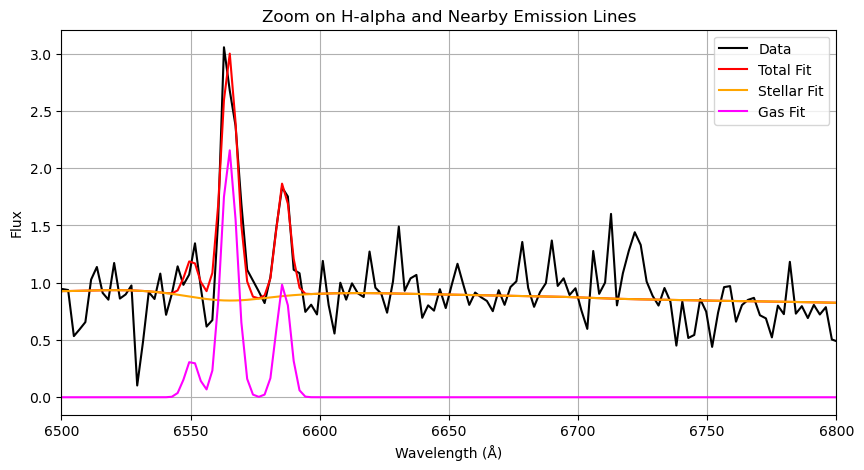

σ (km/s): 71.35

Window centre: 178


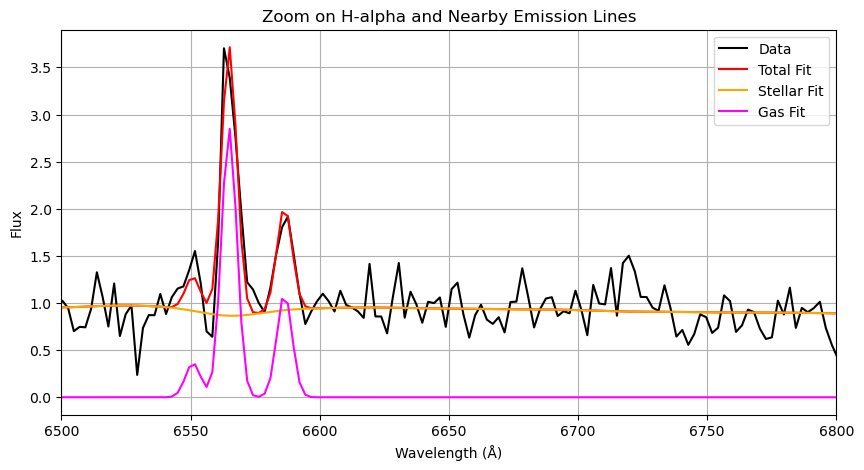

σ (km/s): 60.90

Window centre: 179


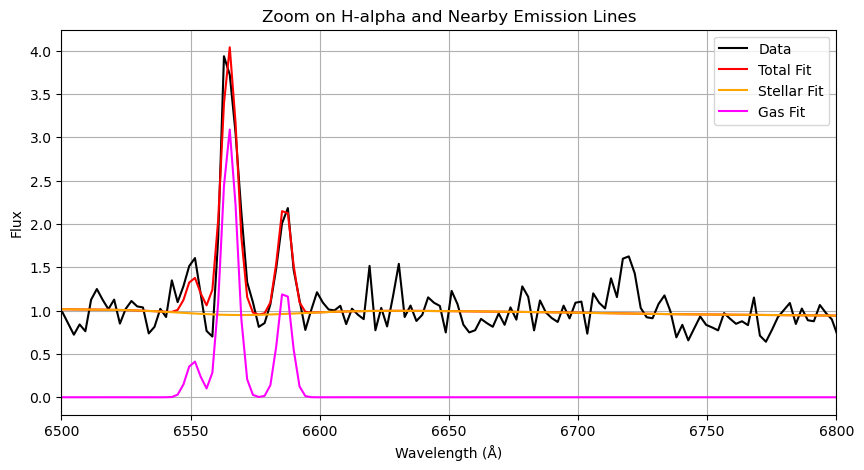

σ (km/s): 63.27

Window centre: 180


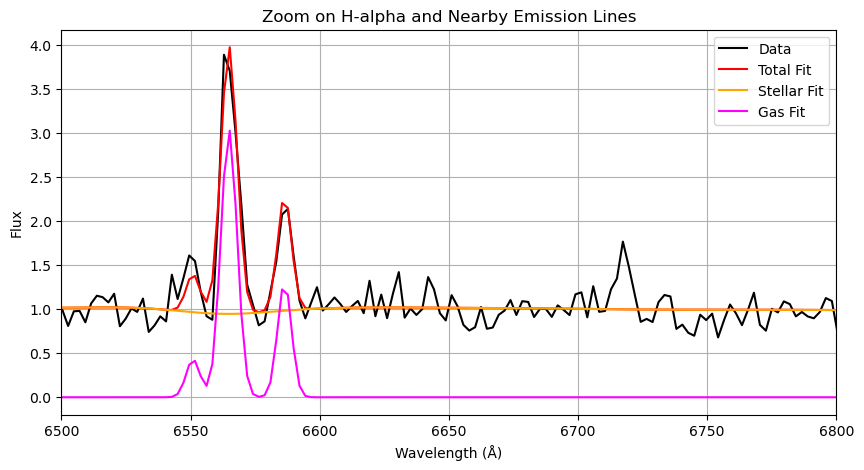

σ (km/s): 77.25

Window centre: 181


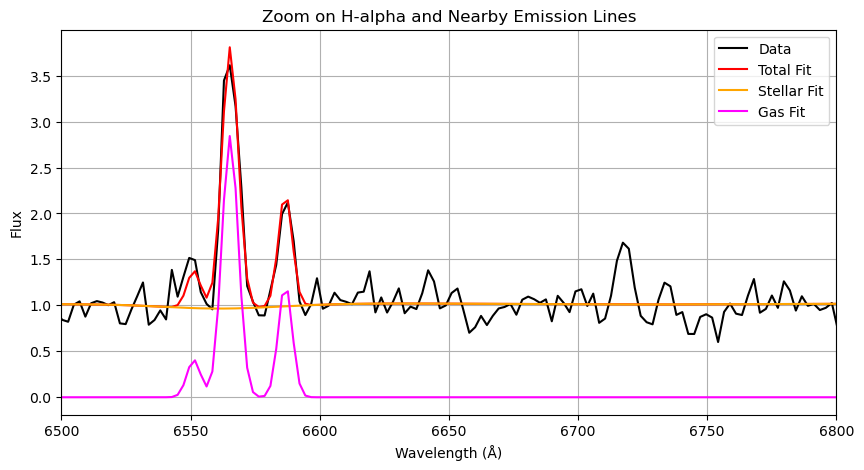

σ (km/s): 79.94

Window centre: 182


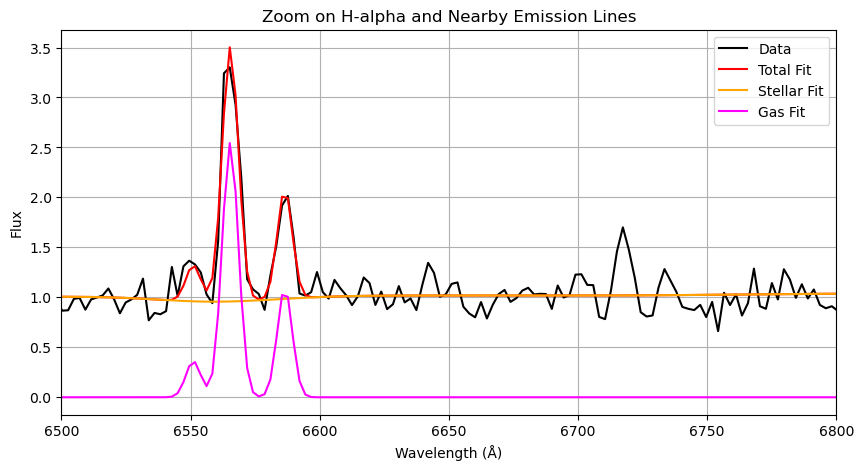

σ (km/s): 78.14

Window centre: 183


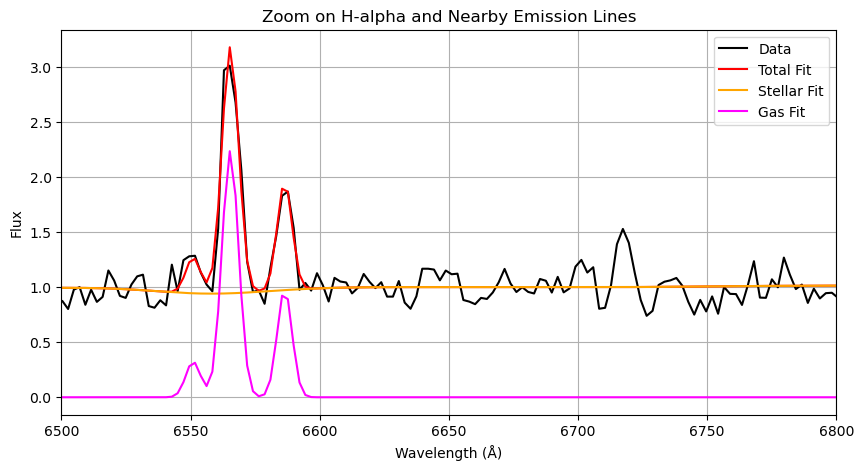

σ (km/s): 84.98

Window centre: 184


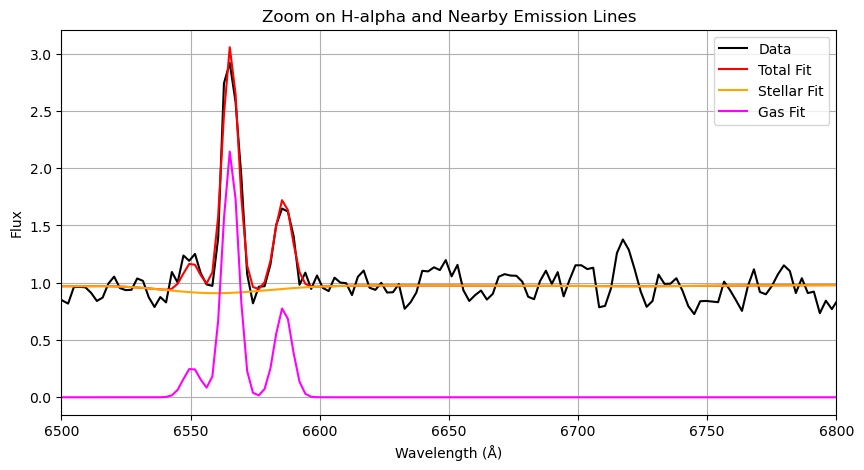

σ (km/s): 72.64

Window centre: 185


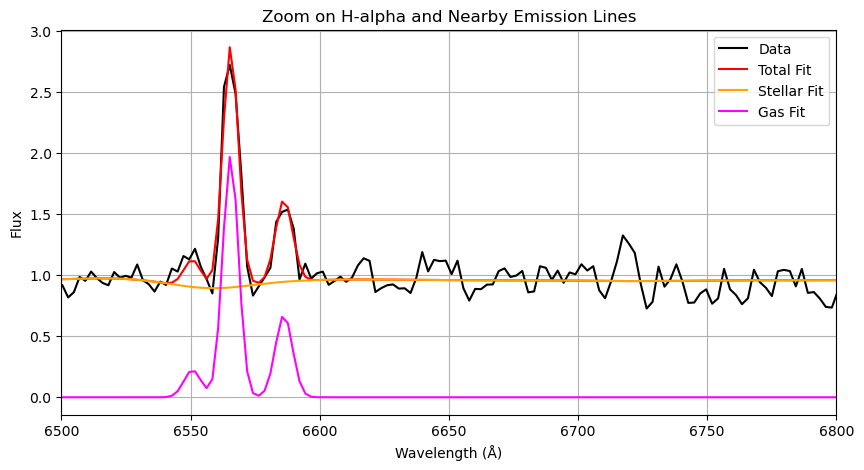

σ (km/s): 68.89

Window centre: 186


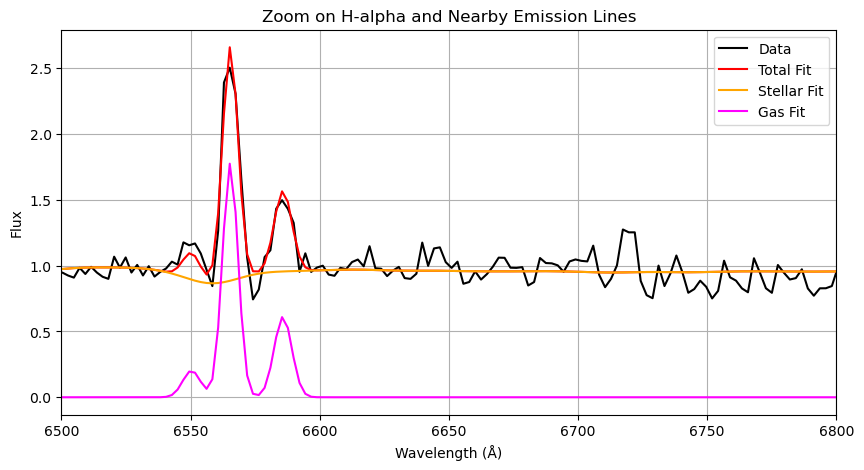

σ (km/s): 65.83

Window centre: 187


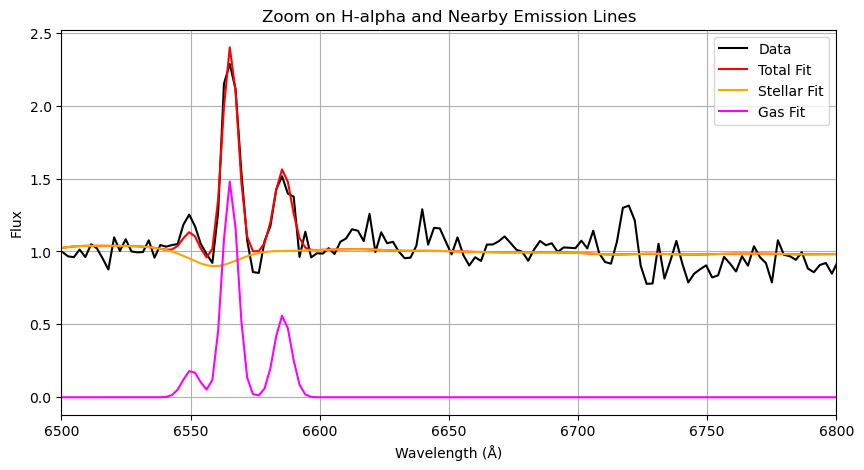

σ (km/s): 66.79

Window centre: 188


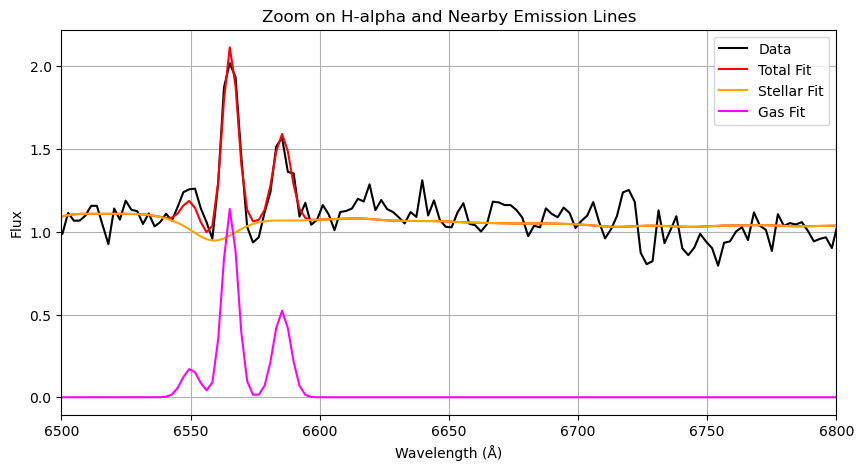

σ (km/s): 64.36

Window centre: 189


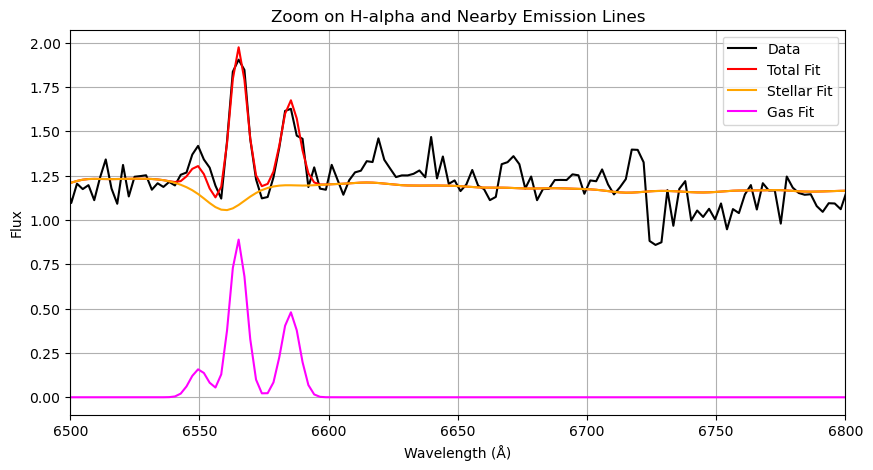

σ (km/s): 90.27

Window centre: 190


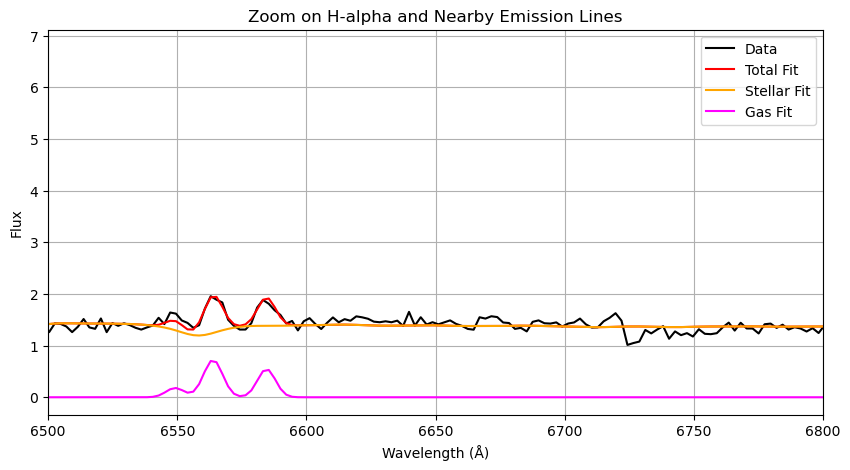

σ (km/s): 119.13

Window centre: 191


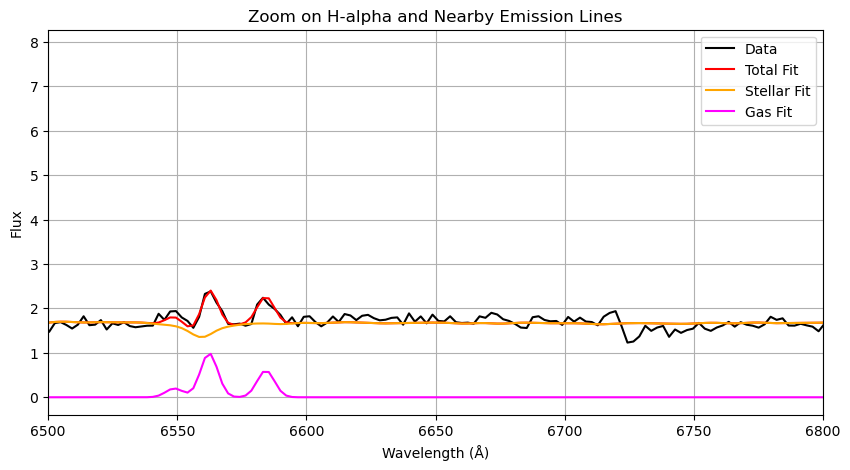

σ (km/s): 93.38

Window centre: 192


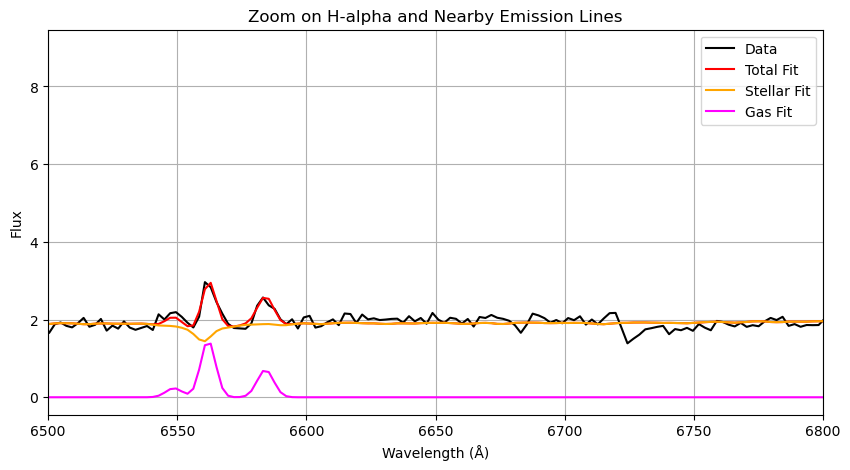

σ (km/s): 53.99

Window centre: 193


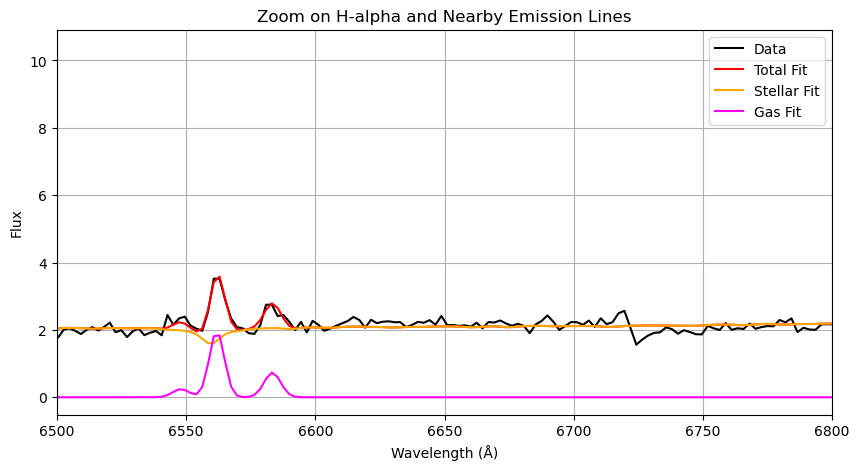

σ (km/s): 55.39

Window centre: 194


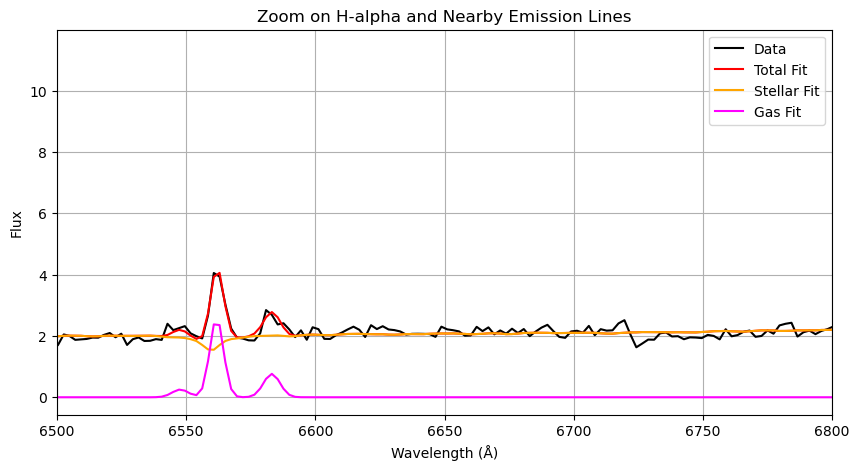

σ (km/s): 13.27

Window centre: 195


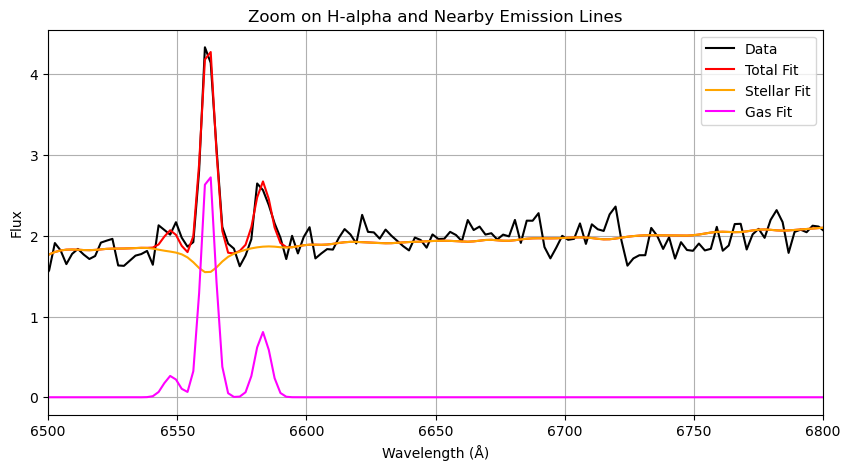

σ (km/s): 31.17

Window centre: 196


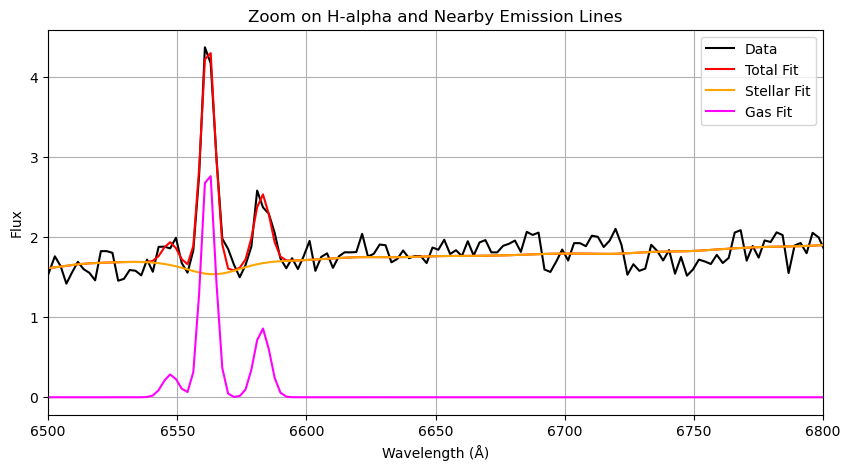

σ (km/s): 24.82

Window centre: 197


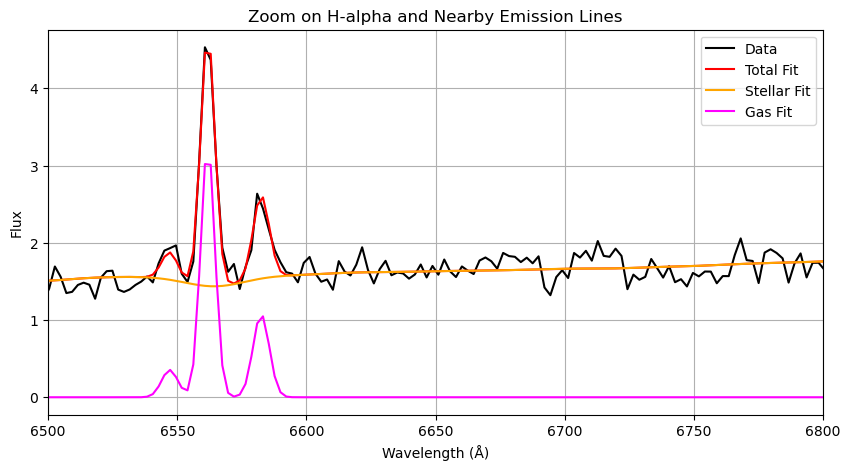

σ (km/s): 38.24

Window centre: 198


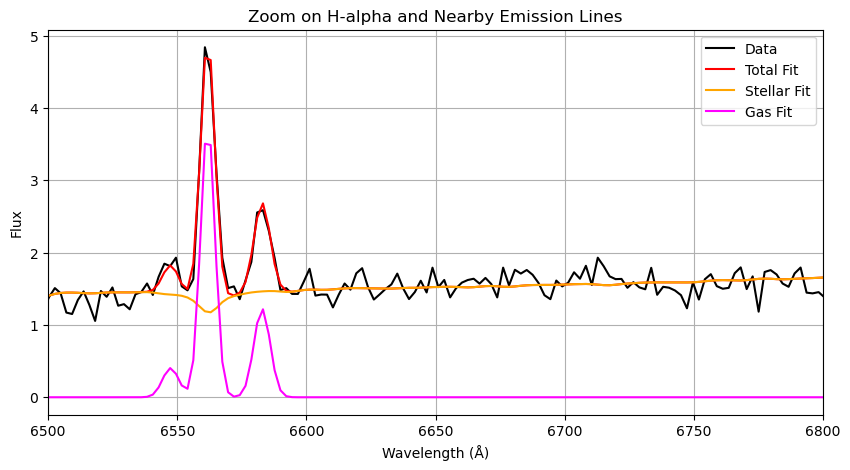

σ (km/s): 41.25

Window centre: 199


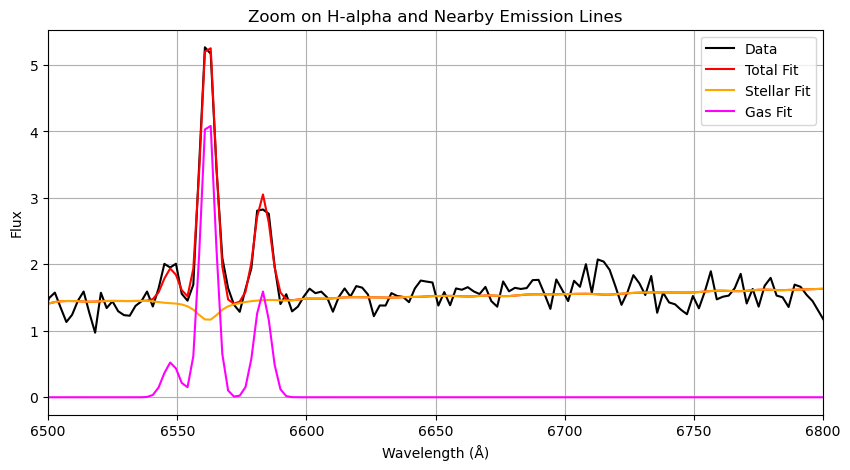

σ (km/s): 49.55

Window centre: 200


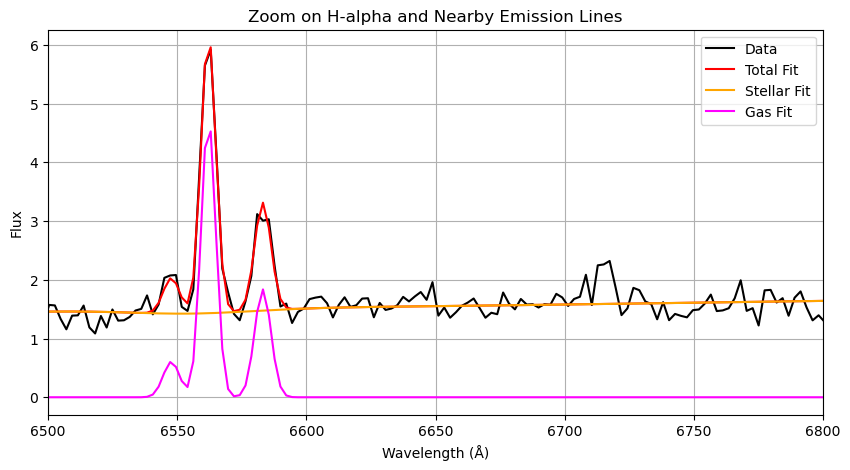

σ (km/s): 52.34

Window centre: 201


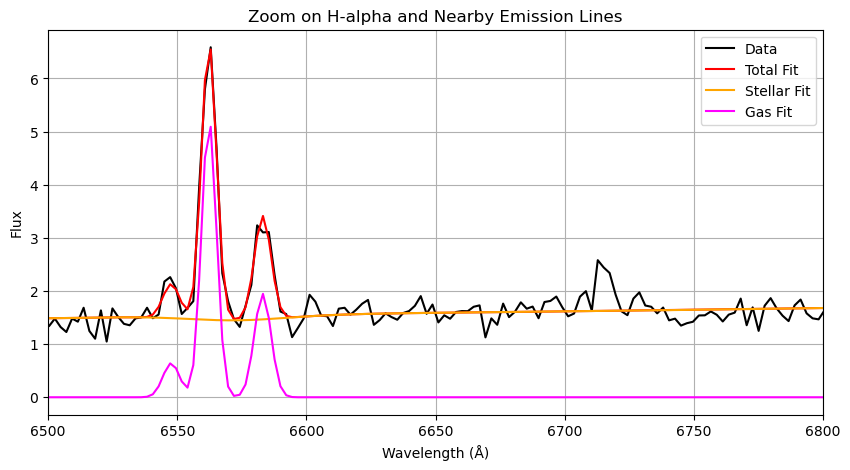

σ (km/s): 55.42

Window centre: 202


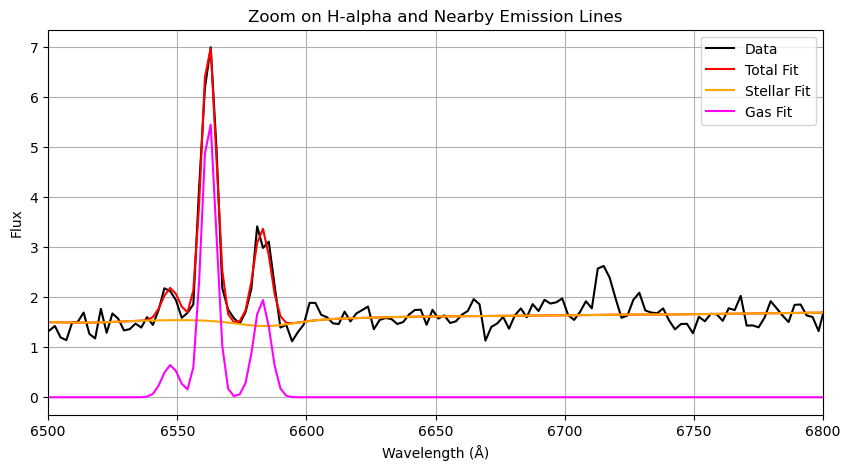

σ (km/s): 46.23

Window centre: 203


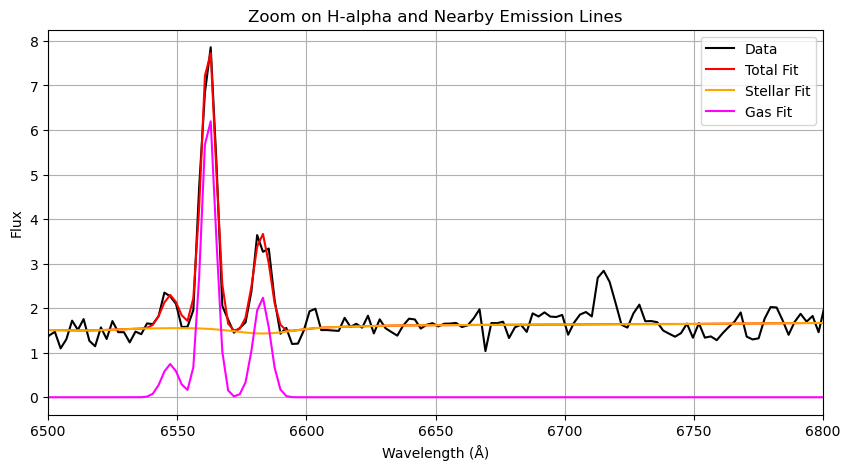

σ (km/s): 38.25

Window centre: 204


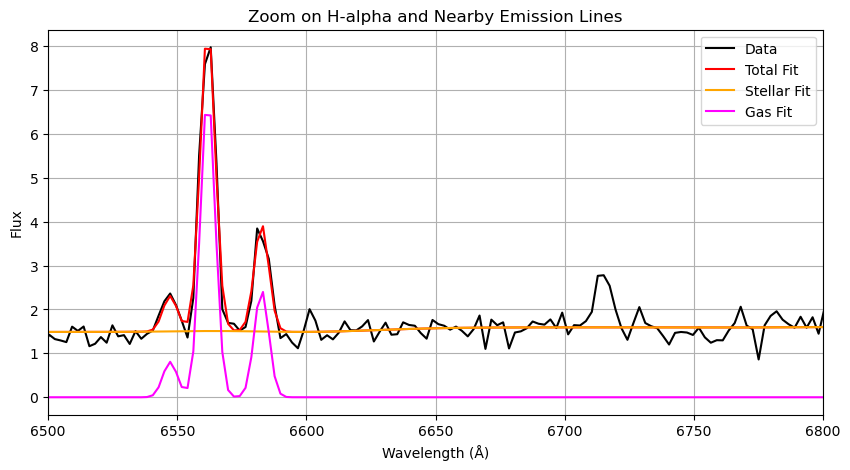

σ (km/s): 52.89

Window centre: 205


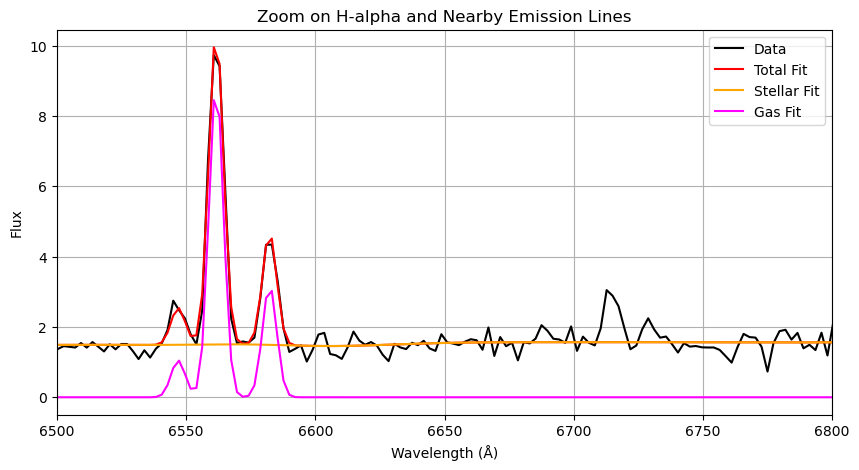

σ (km/s): 46.18

Window centre: 206


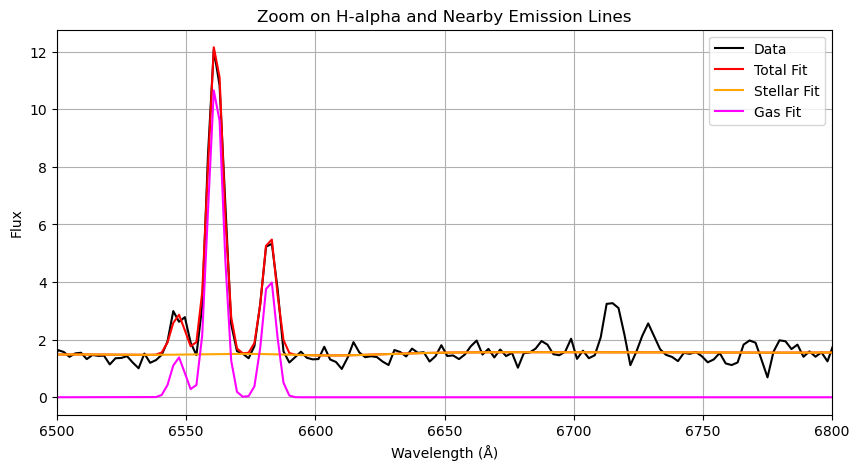

σ (km/s): 54.22

Window centre: 207


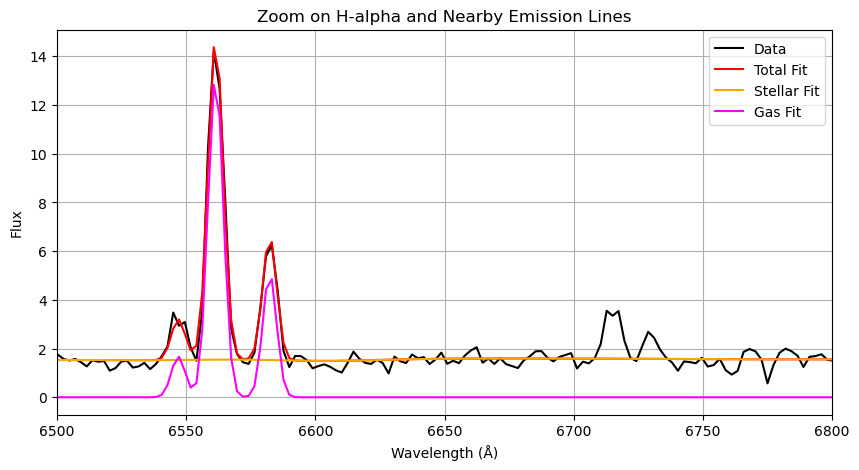

σ (km/s): 58.90

Window centre: 208


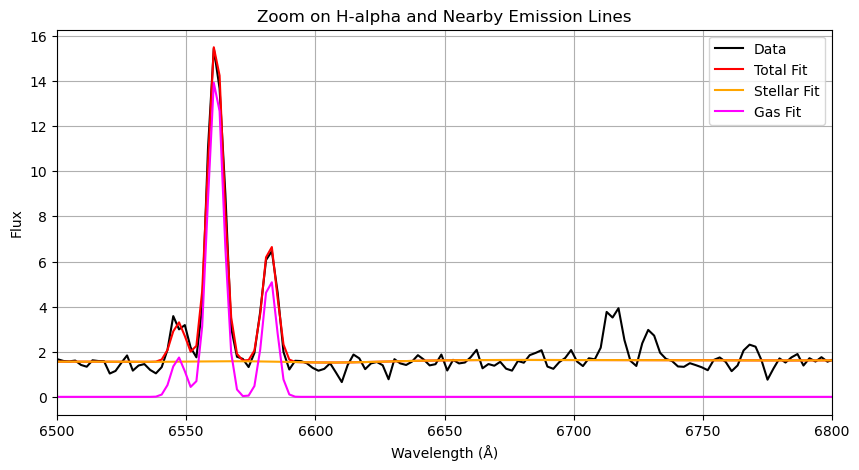

σ (km/s): 65.19

Window centre: 209


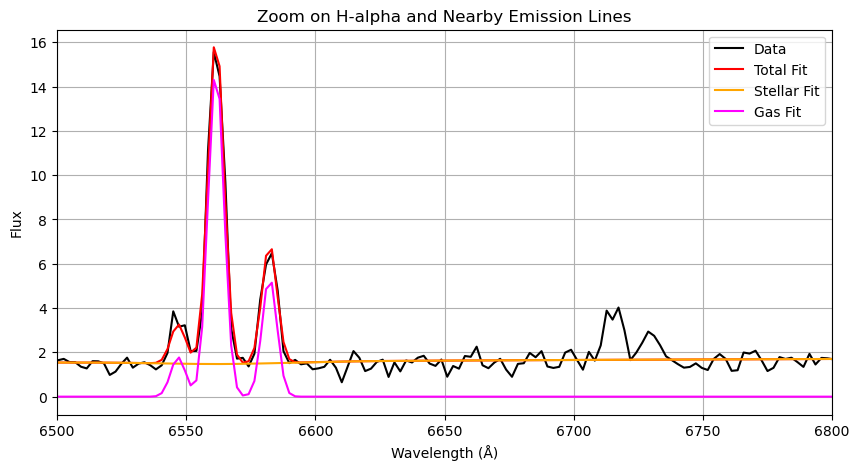

σ (km/s): 69.08

Window centre: 210


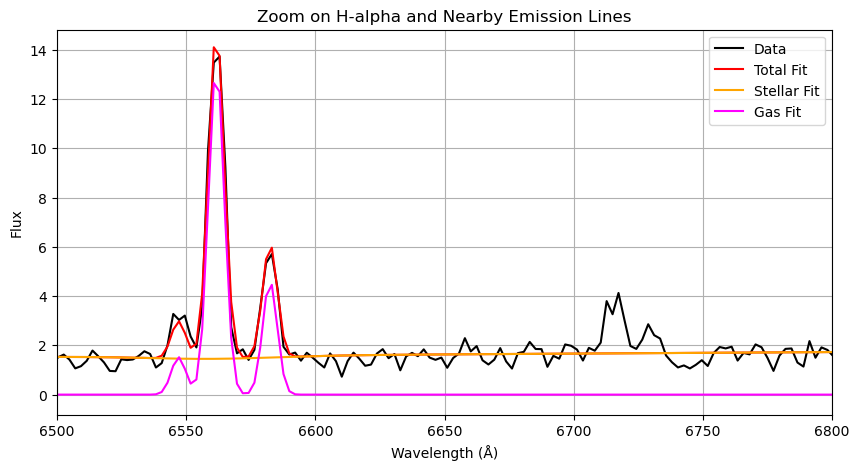

σ (km/s): 70.71

Window centre: 211


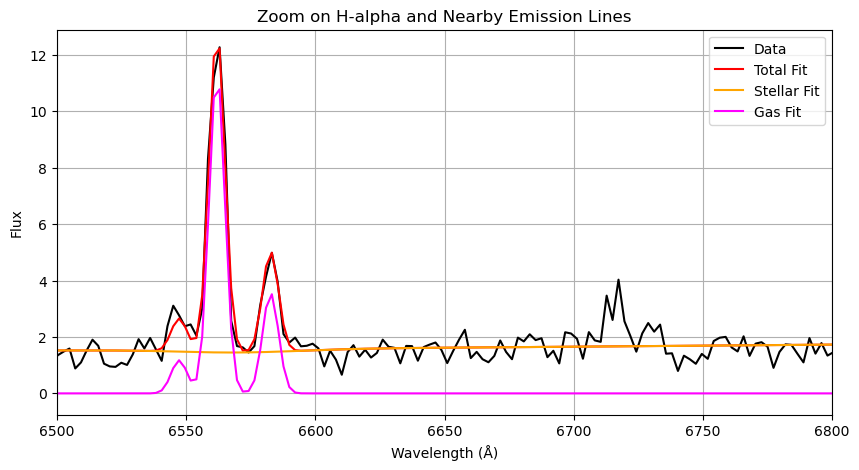

σ (km/s): 71.85

Window centre: 212


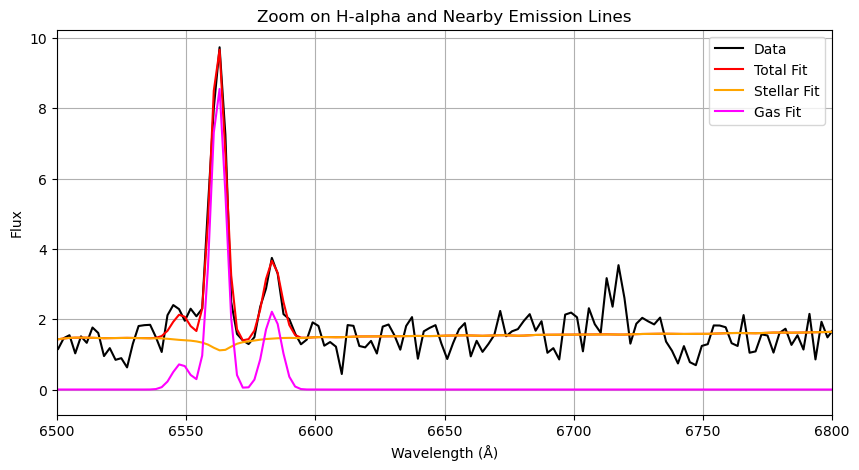

σ (km/s): 59.33

Window centre: 213


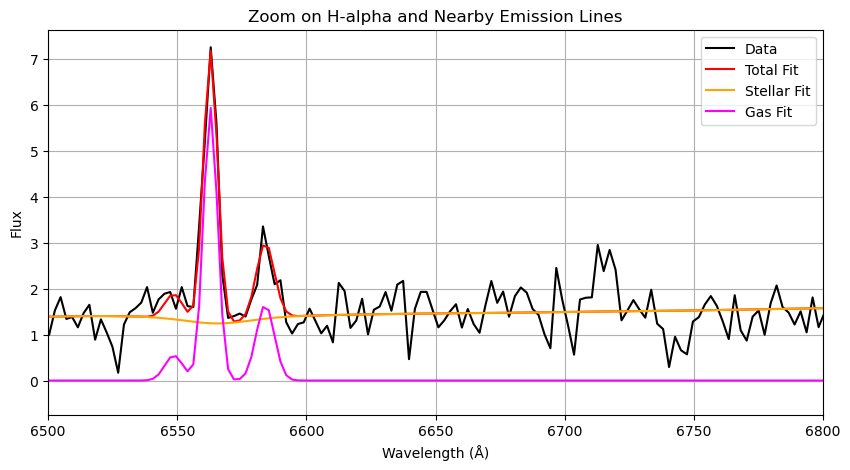

σ (km/s): 30.01

Window centre: 214


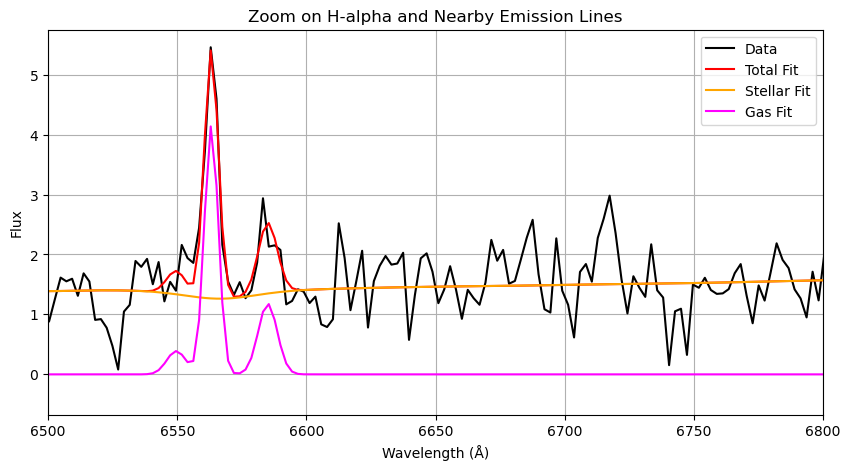

σ (km/s): 25.53

Window centre: 215


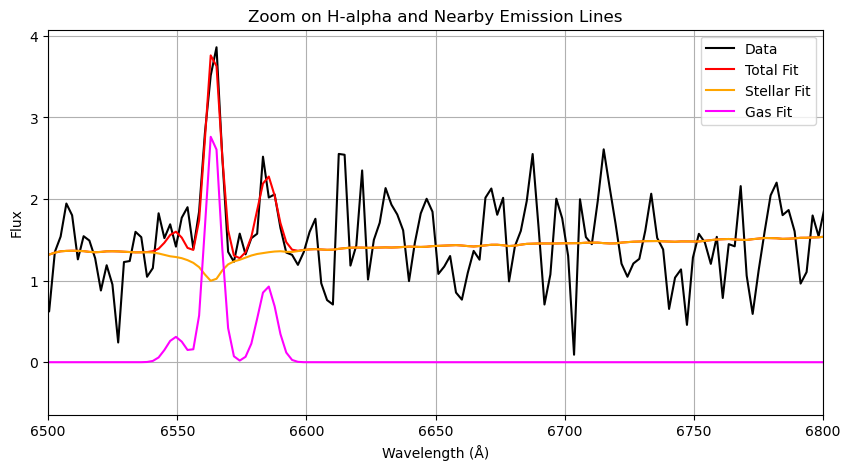

σ (km/s): 62.70

Window centre: 216


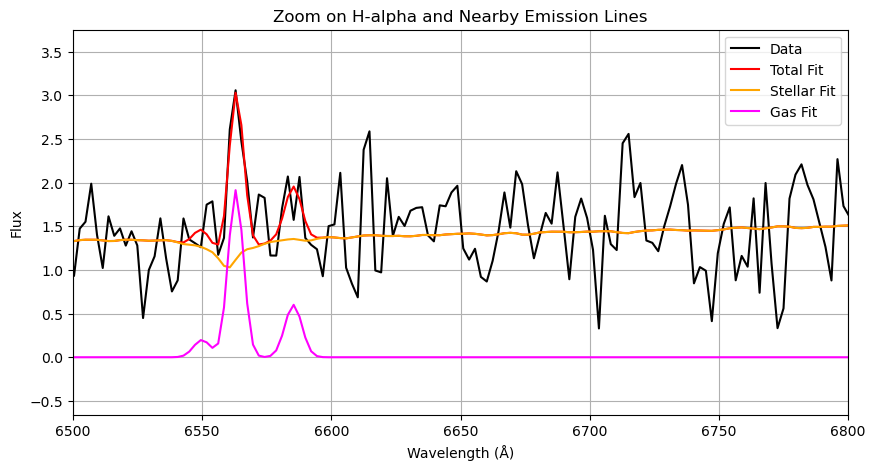

σ (km/s): 58.20

Window centre: 217


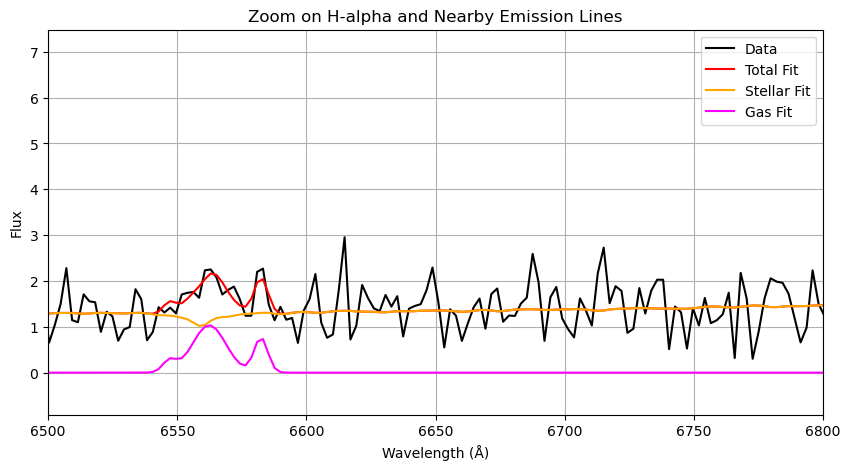

σ (km/s): 269.11

Window centre: 218


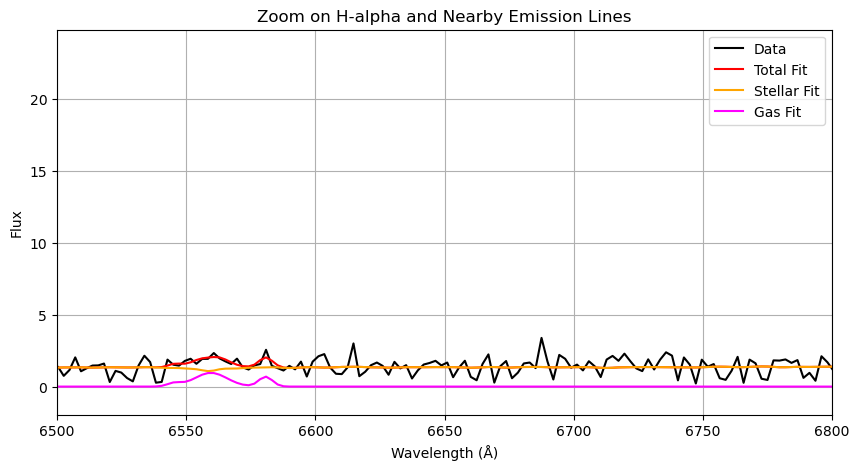

σ (km/s): 259.04

Window centre: 219


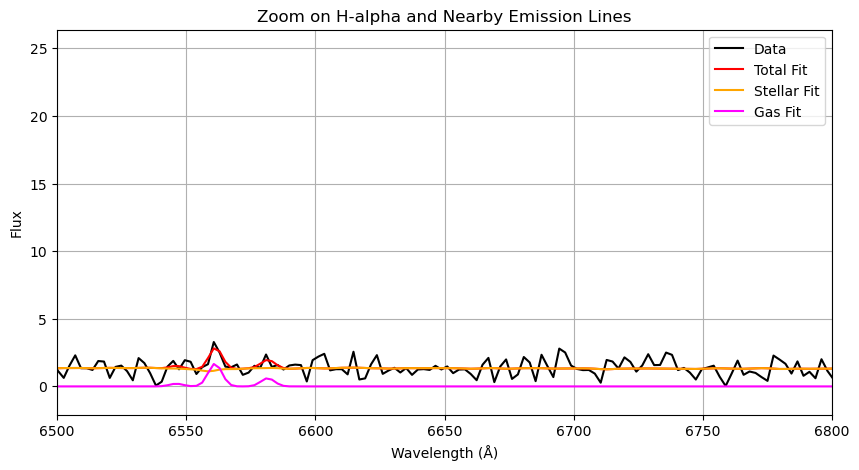

σ (km/s): 1.03

Window centre: 220


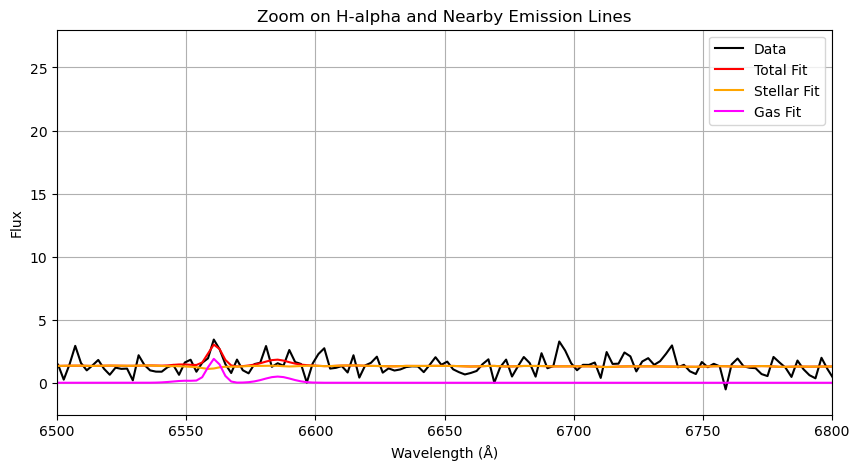

σ (km/s): 1.03

Window centre: 221


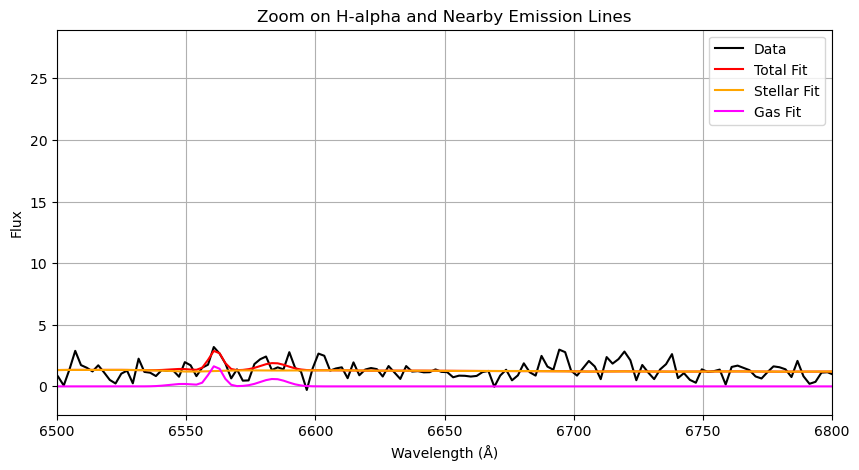

σ (km/s): 1.03

Window centre: 222


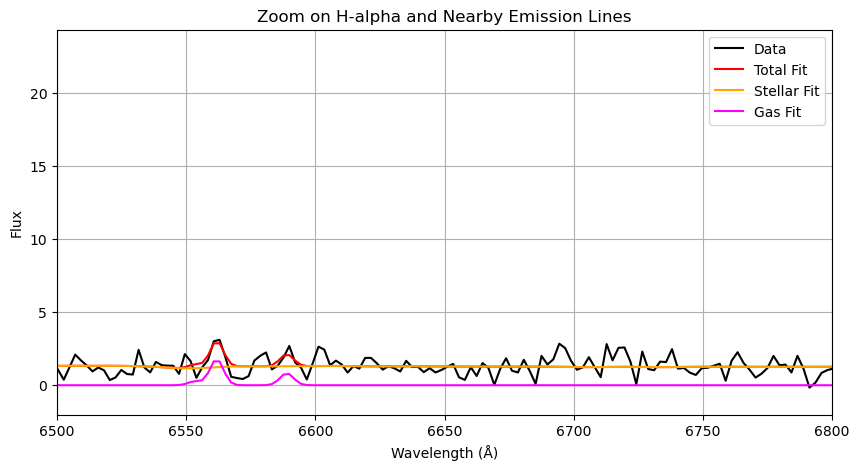

σ (km/s): 1.03

Window centre: 223


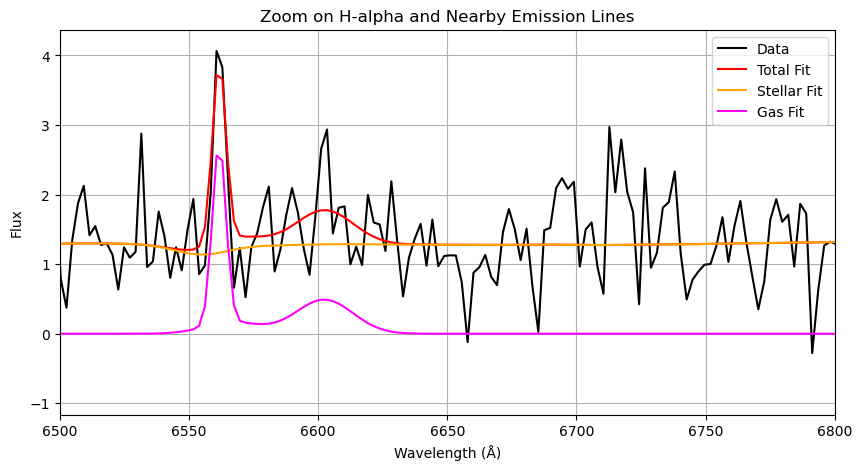

σ (km/s): 1.03

Window centre: 224


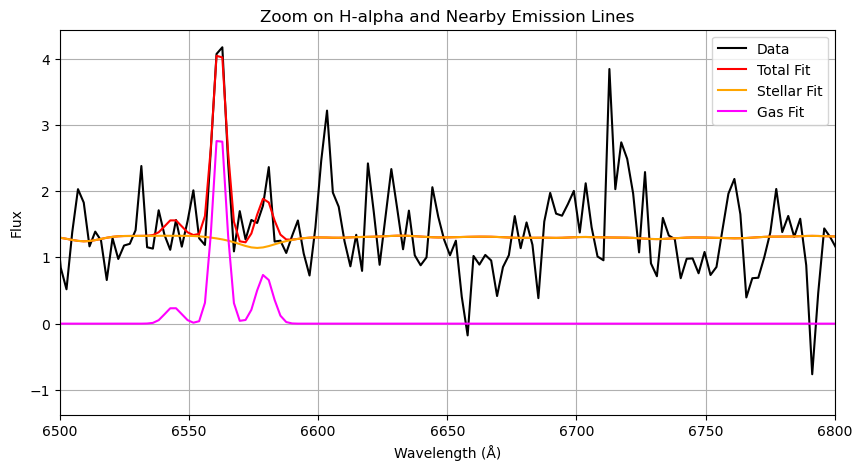

σ (km/s): 1.03

Window centre: 225


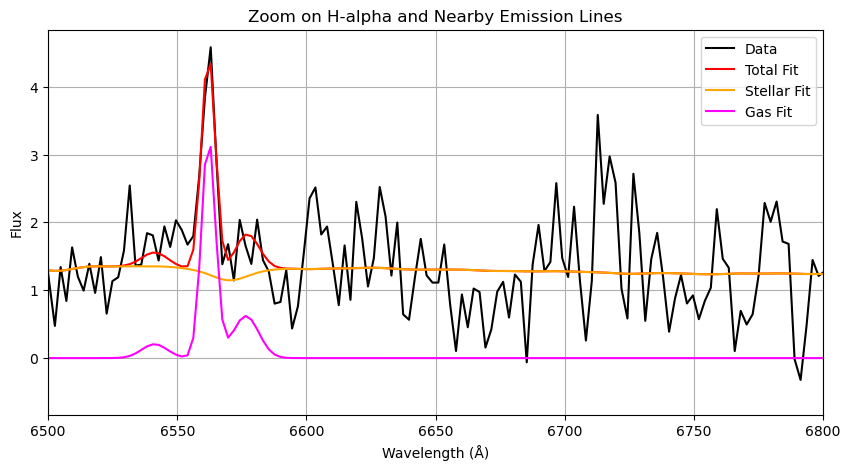

σ (km/s): 24.07

Window centre: 226


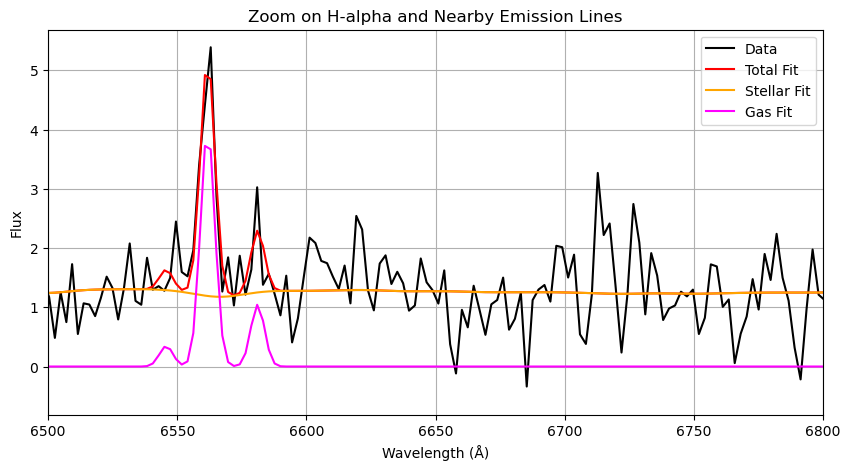

σ (km/s): 44.46

Window centre: 227


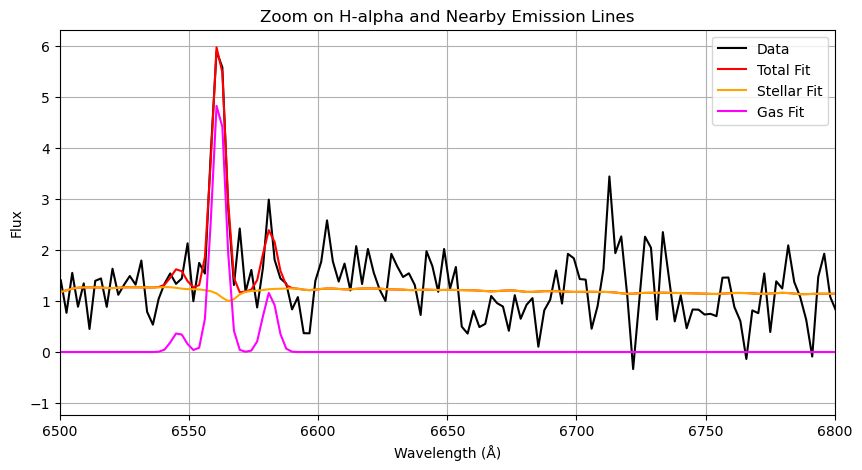

σ (km/s): 1.03

Window centre: 228


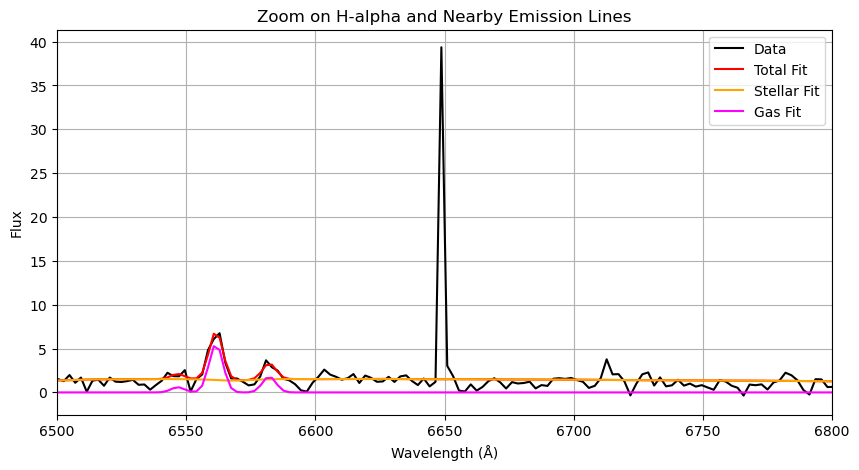

σ (km/s): 23.55

Window centre: 229


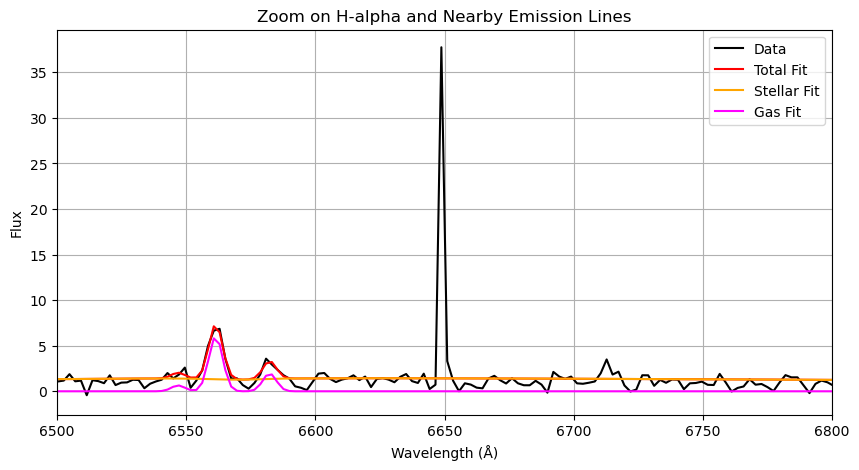

σ (km/s): 27.78

Window centre: 230


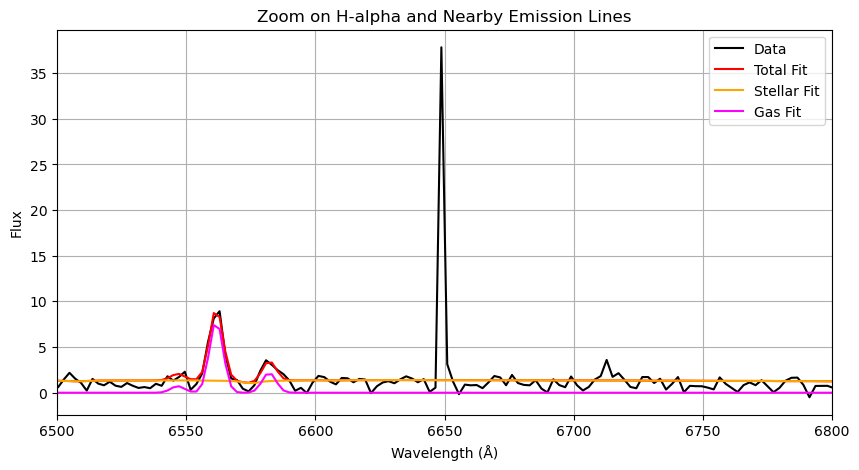

σ (km/s): 1.03

Window centre: 231


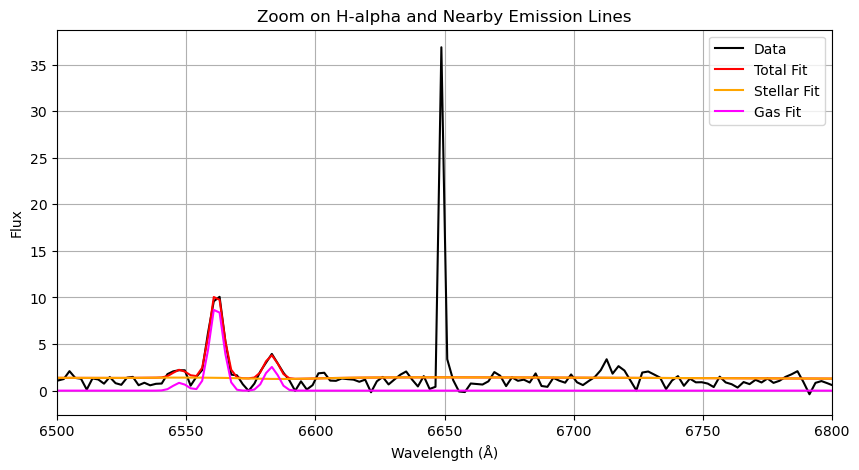

σ (km/s): 6.64

Window centre: 232


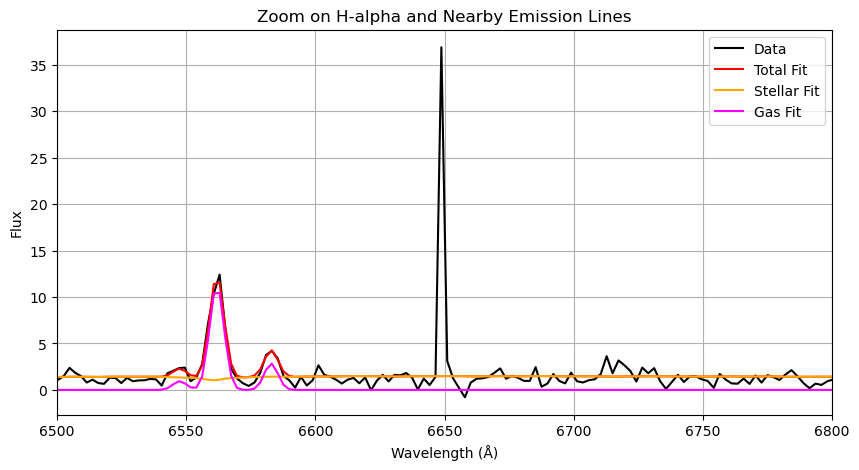

σ (km/s): 41.26

Window centre: 233


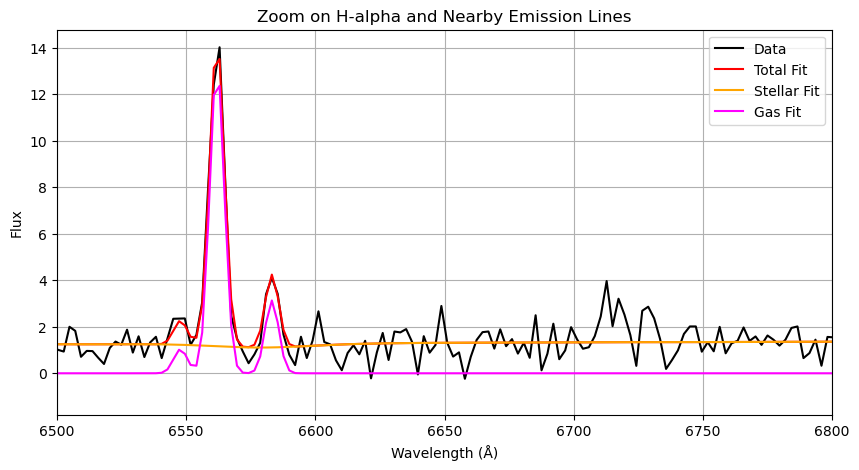

σ (km/s): 49.62

Window centre: 234


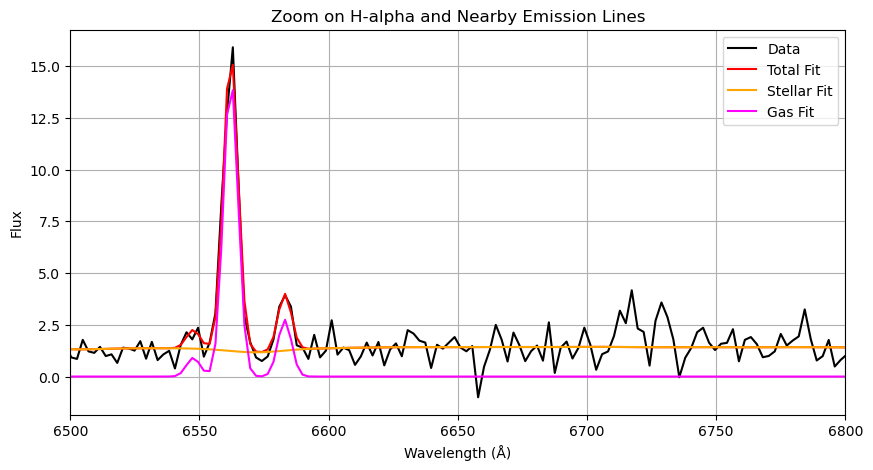

σ (km/s): 45.75

Window centre: 235


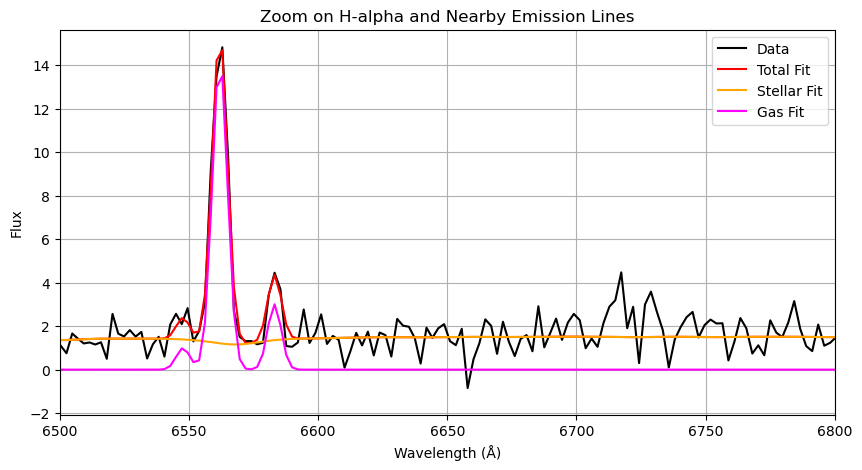

σ (km/s): 61.99

Window centre: 236


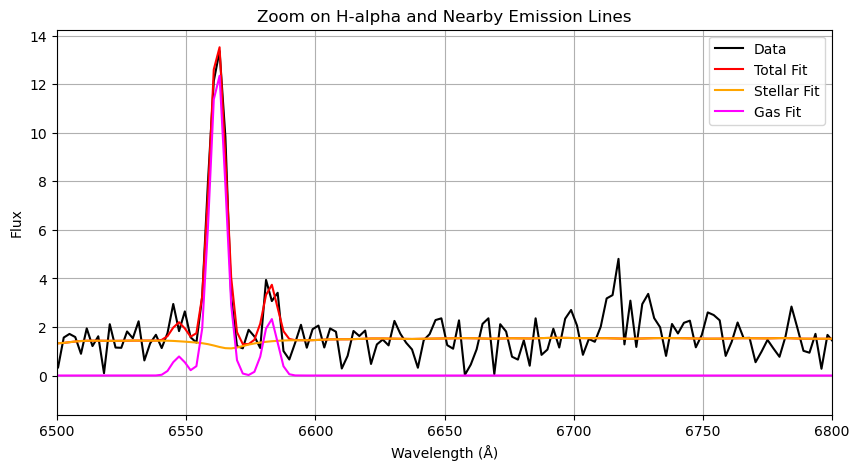

σ (km/s): 71.70

Window centre: 237


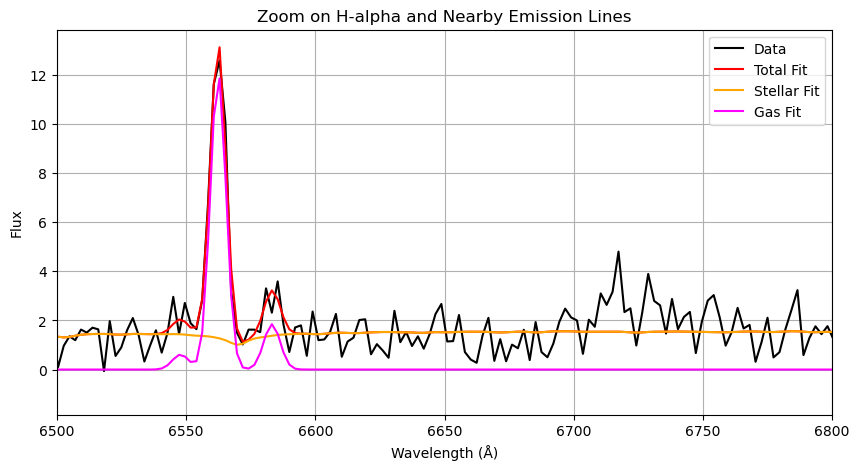

σ (km/s): 67.64

Window centre: 238


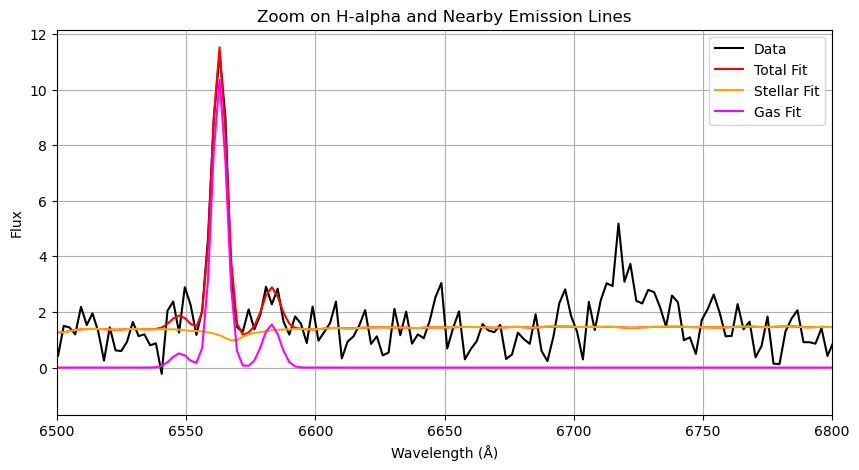

σ (km/s): 49.93

Window centre: 239


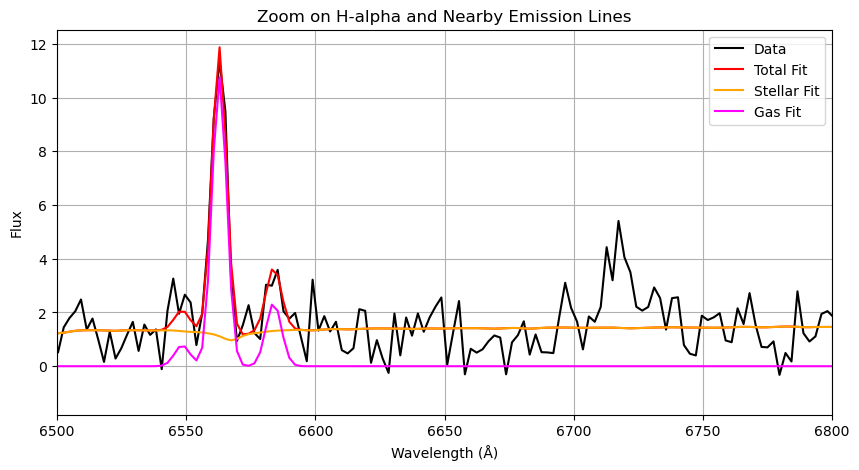

σ (km/s): 44.89

Window centre: 240


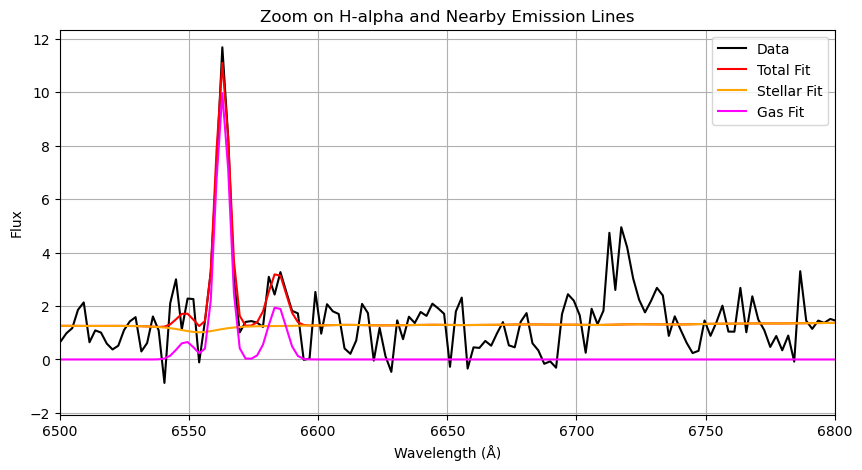

σ (km/s): 1.03

Window centre: 241


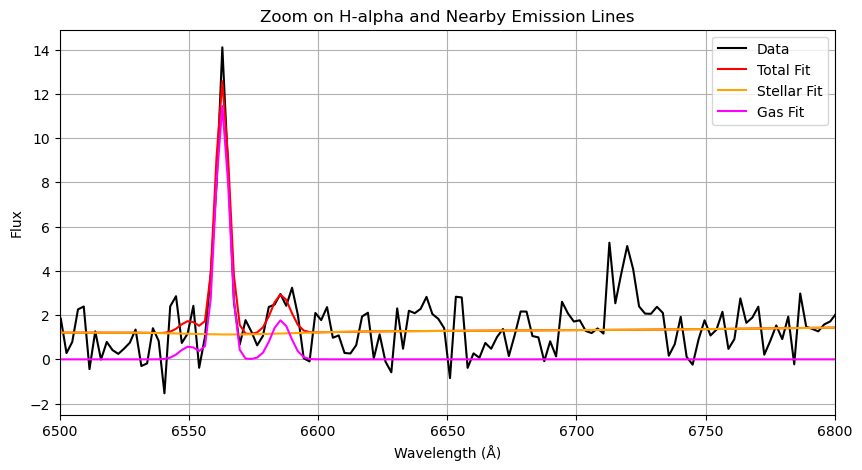

σ (km/s): 1.03

Window centre: 242


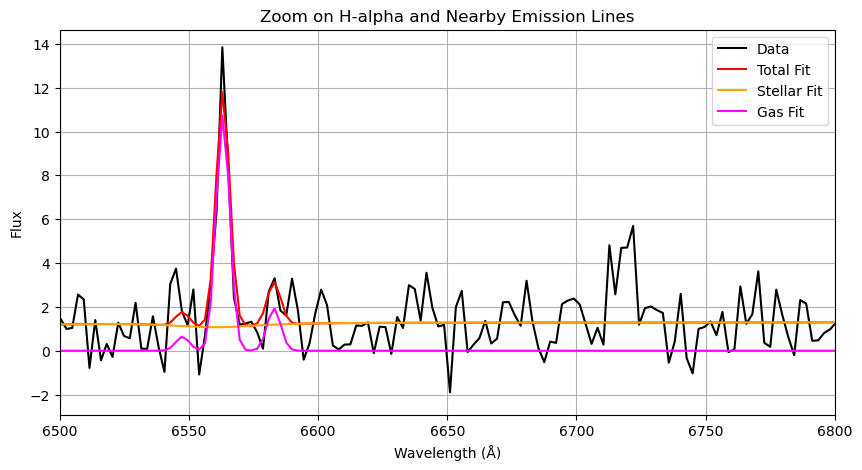

σ (km/s): 1.03

Window centre: 243


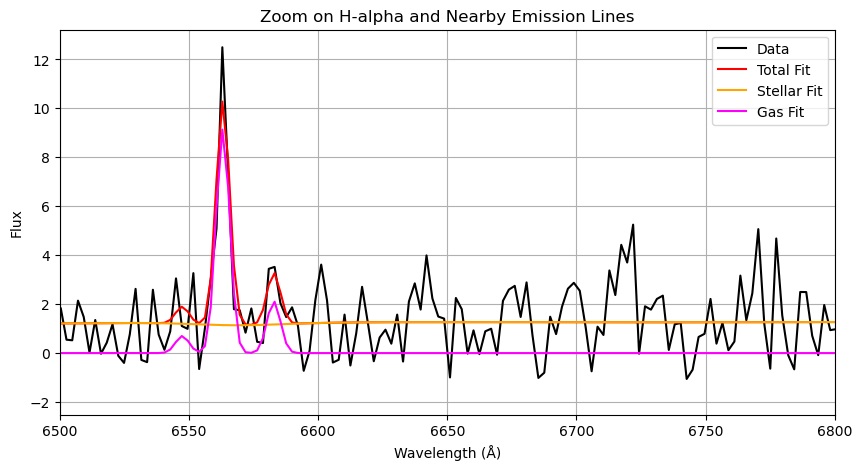

σ (km/s): 1.03

Window centre: 244


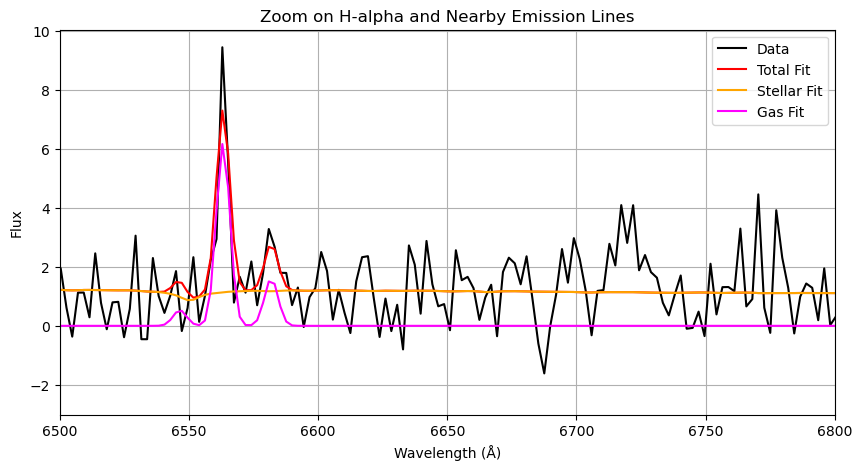

σ (km/s): 1.03

Window centre: 245


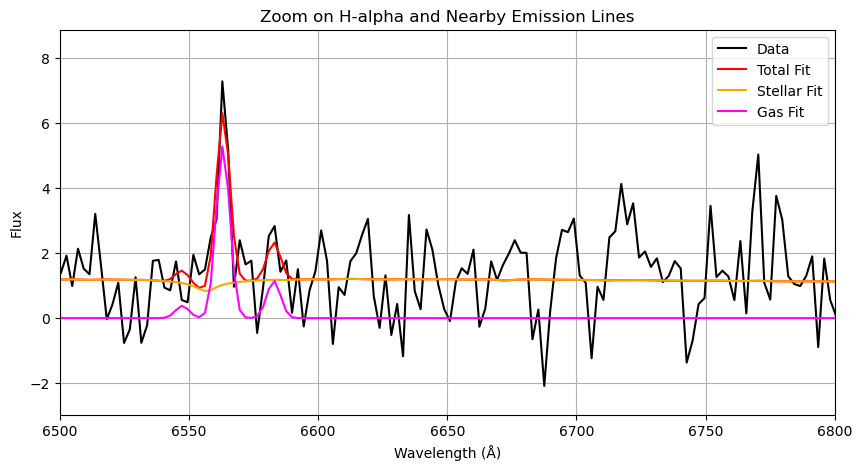

σ (km/s): 1.03

Window centre: 246


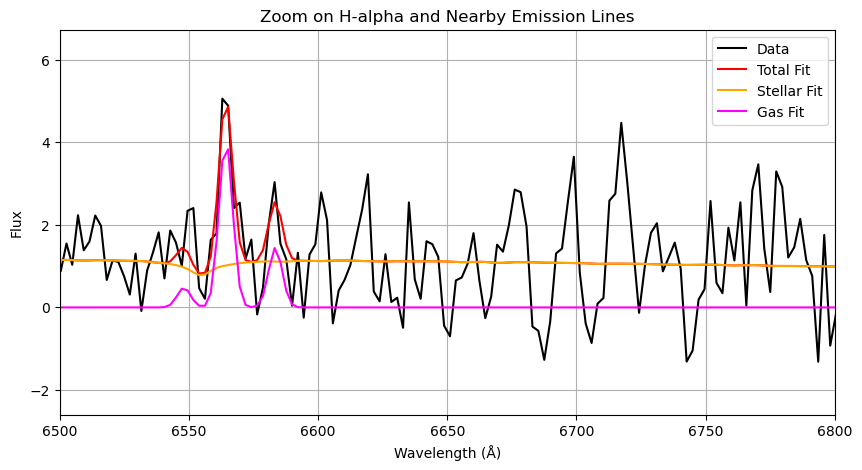

σ (km/s): 1.03

Window centre: 247


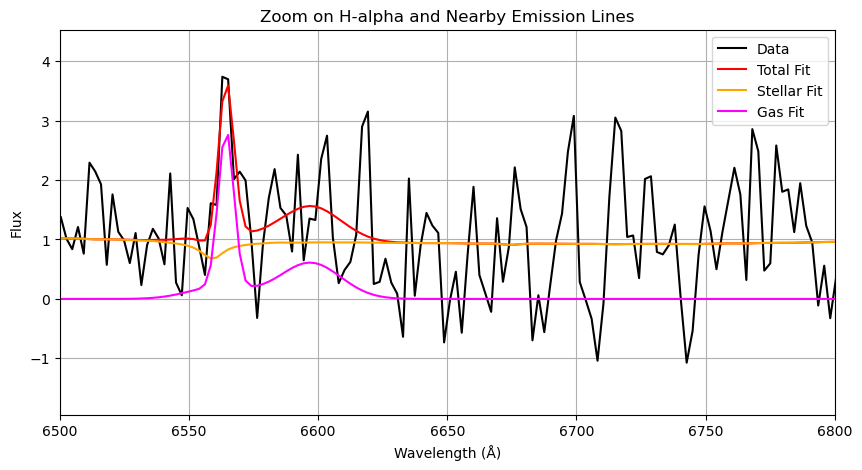

σ (km/s): 65.06



In [4]:
for center, df_rb, pp in results[25:100]:
    # Ensure the function can access 'lam'
    lam_array = df_rb['lam'].values
    plot_ppxf.__globals__['lam'] = lam_array

    print(f"Window centre: {center}")
    plot_ppxf(df_rb, pp)

    # Extract and print the Hα sigma (km/s)
    sigma = pp.sol[1][1]
    print(f"σ (km/s): {sigma:.2f}\n")

In [5]:
centers     = []
velocities  = []; v_errs     = []
dispersions = []; sigma_errs = []
EWs         = []; EW_errs    = []

for center, _, pp in results:
    # --- extract Hα kinematics from the list ---
    sol_gas    = pp.sol[1]
    err_gas    = pp.error[1]
    v_ha, sigma_ha       = sol_gas
    #sigma = np.sqrt(sigma_inst**2 + sigma_ha**2)

    v_ha_err, sigma_ha_err = err_gas

    # find Hα in gas_names (should be idx 0 here)
    idx = np.where(pp.gas_names == "Halpha")[0][0]

    # compute flux, continuum & EW as before
    flux_ha   = pp.gas_flux[idx]
    continuum = pp.bestfit - pp.gas_bestfit
    peak_i    = np.argmax(pp.gas_bestfit_templates[:, idx])
    cont0     = continuum[peak_i]
    cont_err  = pp.noise[peak_i]
    flux_err  = pp.gas_flux_error[idx]

    EW        = flux_ha / cont0
    EW_err    = abs(EW) * np.sqrt((cont_err/cont0)**2 + (flux_err/flux_ha)**2)

    # store
    centers.append(center)
    velocities.append(v_ha)
    v_errs.append(v_ha_err)
    dispersions.append(sigma_ha)
    sigma_errs.append(sigma_ha_err)
    EWs.append(EW)
    EW_errs.append(EW_err)


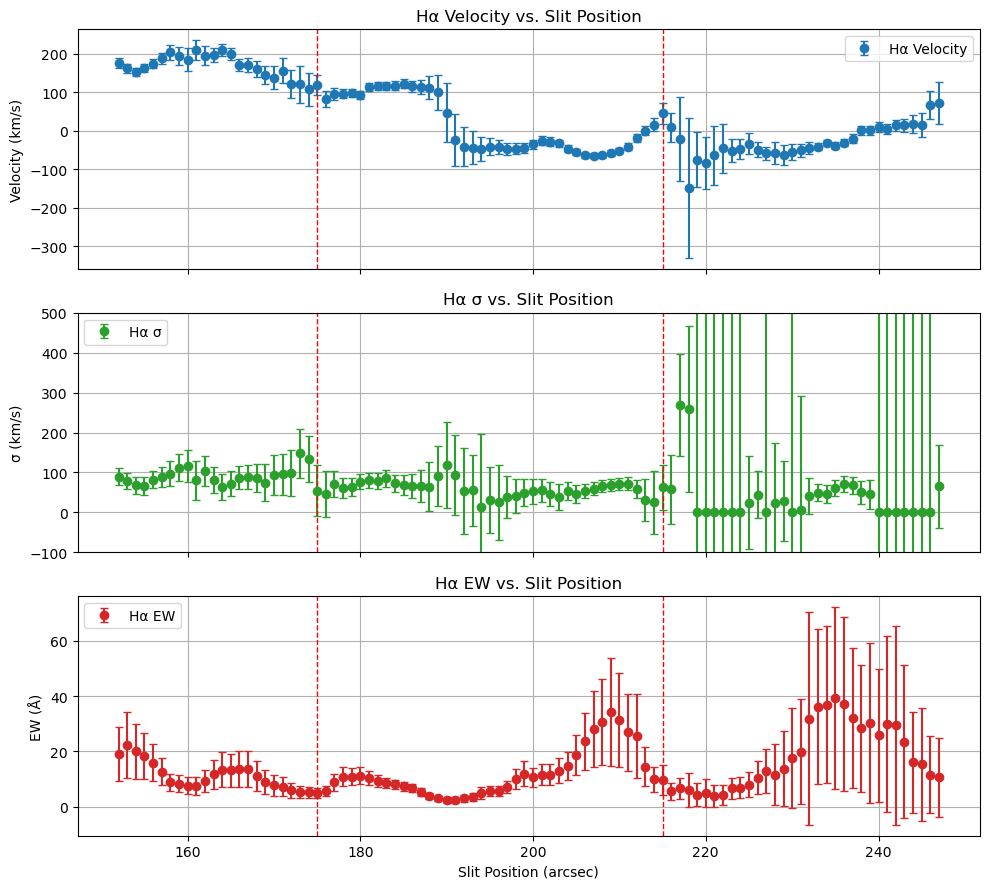

In [6]:
fig, axs = plt.subplots(3,1,figsize=(10,9),sharex=True)

colors = ['#1f77b4', '#2ca02c', '#d62728']  # blue, green, red


# Velocity
axs[0].errorbar(centers, velocities, yerr=v_errs,
                fmt='o', ecolor=colors[0], color=colors[0],
                capsize=3, label='Hα Velocity')
axs[0].set_ylabel("Velocity (km/s)")
axs[0].set_title("Hα Velocity vs. Slit Position")
axs[0].axvline(175, color='red', ls='--', lw=1)
axs[0].axvline(215, color='red', ls='--', lw=1)
axs[0].legend(); axs[0].grid(True)

# Dispersion
axs[1].errorbar(centers, dispersions, yerr=sigma_errs,
                fmt='o', ecolor=colors[1], color=colors[1],
                capsize=3, label='Hα σ')
axs[1].set_ylim(-100,500)
axs[1].set_ylabel("σ (km/s)")
axs[1].set_title("Hα σ vs. Slit Position")
axs[1].axvline(175, color='red', ls='--', lw=1)
axs[1].axvline(215, color='red', ls='--', lw=1)
axs[1].legend(); axs[1].grid(True)

# Equivalent Width
axs[2].errorbar(centers, EWs, yerr = EW_errs,
                fmt='o', ecolor=colors[2], color=colors[2],
                capsize=3, label='Hα EW')
axs[2].set_ylabel("EW (Å)")
axs[2].set_xlabel("Slit Position (arcsec)")
axs[2].set_title("Hα EW vs. Slit Position")
axs[2].axvline(175, color='red', ls='--', lw=1)
axs[2].axvline(215, color='red', ls='--', lw=1)
axs[2].legend(); axs[2].grid(True)

plt.tight_layout()
plt.show()


In [7]:
df = pd.DataFrame({
    'center':        centers,
    'velocity':      velocities,
    'velocity_err':  v_errs,
    'dispersion':    dispersions,
    'dispersion_err': sigma_errs,
    'EW':            EWs,
    'EW_err':        EW_errs
})

# Save to CSV
df.to_csv('../halpha results/NB6_halpha_results.csv', index=False)
